<a href="https://colab.research.google.com/github/shanzabakhtds/-HR-Employee-Attrition-and-Performance-Analysis/blob/main/_FInal_Project_Logistic_Regression_on_HR_Employee_Attrittion_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### > **Perfroming EDA on Employee-Attrition  Dataset**

---





**Importing Libraries**

In [ ]:
# for reshaping arrays and working with numerical data
import numpy as np

#used for working with datasets, offering functions for data analysis, cleaning, exploration, and manipulation
import pandas as pd

#used for pie charts for visualizing results
from matplotlib import pyplot as plt

import seaborn as sns

#for preparing text data for analysis, It's used to create a matrix of word counts from text reviews, allowing the model to work with textual data
from sklearn.feature_extraction.text import CountVectorizer

#For data preprocessing, model training, performance evaluation, and user interaction
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


**Loding Data**


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# # **DATA  CLEANING**



**Exploring The Dataset**

In [ ]:
# @title
df.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
display(df.head(5))

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
df.tail(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

**Checking the dimension of the dataset**



In [ ]:
#Checking number of rows and columns in a dataset
df.shape


(1470, 35)

In [ ]:
df.describe()  # used to get a descriptive statistics summary of a given dataframe.

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

**learn the shape of object types**

In [ ]:
df.info()  #allows us to learn the shape of object types of our data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Check missing values**

In [ ]:
#Check missing values and helps to understand each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Check data types of Each coloumn**

In [ ]:
df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:

# Display the data types of each column
data_types = df.dtypes

# Filter columns with categorical data
categorical_columns = data_types[data_types == 'object'].index

# Display the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Checking Column Names**

In [ ]:
print("\n Columns Names are : ")
print("  ")
df.columns




 Columns Names are : 
  


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
statistics = df.describe().transpose()
print("\nDescriptive Statistics:")
print(" ")
print(statistics)


Descriptive Statistics:
 
                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome

ABOVE HERE


Count: This shows the total number.

Mean: Shows the average.

Std: Standard deviation value

Min: Minimum value

25%: First Quantile

50%: Median or Second Quantile

75%: Third Quantile

Max: Maximum value


# **DATA  VISUALIZATION**




**correlation matrix** shows how strongly pairs of variables are related. The values in the matrix range from -1 to 1, where:

1 indicates a strong positive correlation,
          -1 indicates a strong negative correlation, and
                  0 indicates no correlation.

In [ ]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable

    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data=df, x=col_name, color='#5975A4', saturation=1, ax=ax1)
        ax1.set_xlabel(full_name)
        ax1.set_ylabel('Count')
        ax1.set_title(full_name)

          # Add integer count values above the bars
        for p in ax1.patches:
            count = int(p.get_height())  # Convert the count value to an integer
            x = p.get_x() + p.get_width() / 2.0
            y = p.get_height()
            ax1.annotate(f'{count}', (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


    # plot2: bar plot of the variable grouped by Attrition or not
    if continuous:
        sns.boxplot(x=col_name, y='Attrition', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Attrition Status')
    else:
        Attrition_rates = df.groupby(col_name)['Attrition'].value_counts(normalize=True)[:].plot(kind='bar')
        #sns.barplot(Attrition_rates, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction Attrition')
        ax2.set_title('Attrition Rate by ' + full_name)
        ax2.set_xlabel(full_name)

          # Add count values above the bars
        for p in ax2.patches:
            total_height = len(df)  # You can replace this with the total count if needed
            percentage = (p.get_height() / 1) * 100  # Calculate the percentage
            x = p.get_x() + p.get_width() / 2.0
            y = p.get_height()
            ax2.annotate(f'{percentage:.2f}%', (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    # plot3: kde plot of the variable gropued by Attrition_status
    if continuous:
        facet = sns.FacetGrid(df, hue = 'Attrition', aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()
    else:
        fig = plt.figure(figsize=(12,3))
        ax=sns.countplot(x=col_name, hue='Attrition', data=df)

        # Annotate the count above each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()

## Data Visualization for Numerical Variables

C:\Users\HP\AppData\Local\Temp\ipykernel_24696\2026199499.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



C:\Users\HP\AppData\Local\Temp\ipykernel_24696\2026199499.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_24696\2026199499.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_24696\2026199499.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df[col_name].notnull

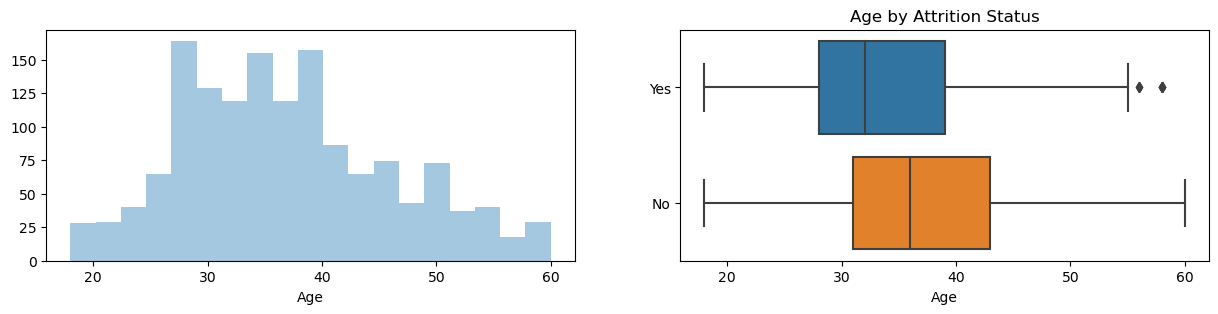

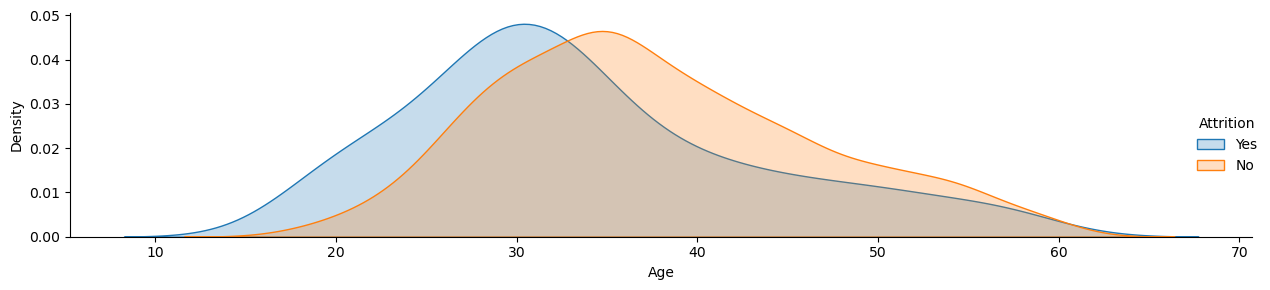

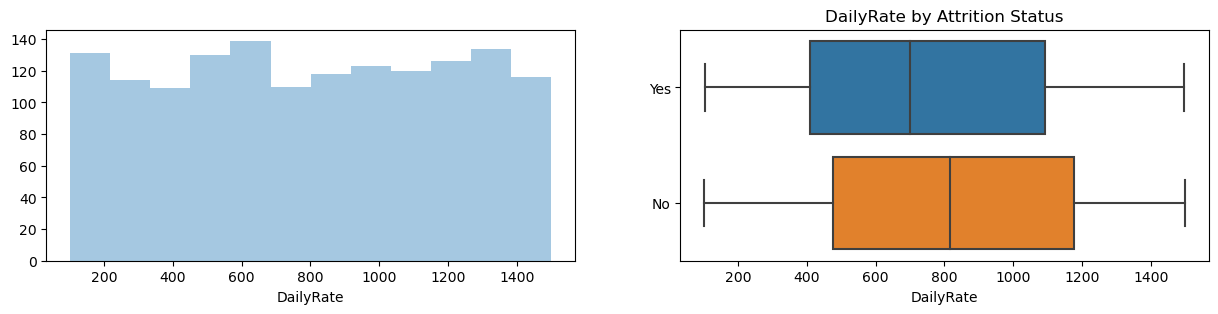

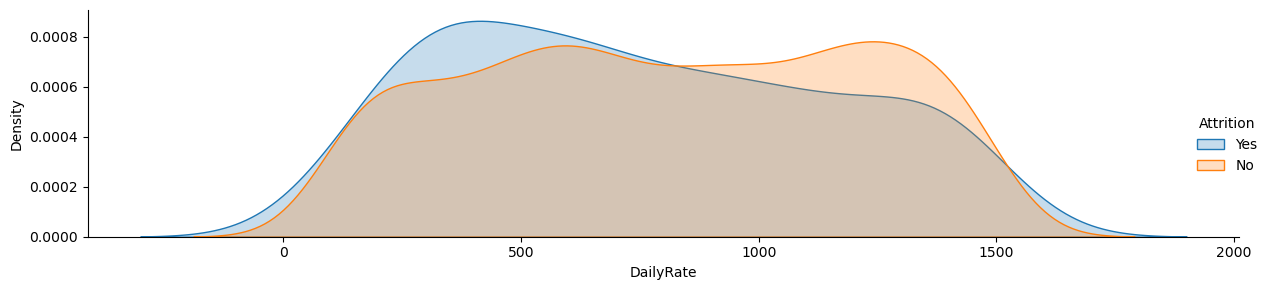

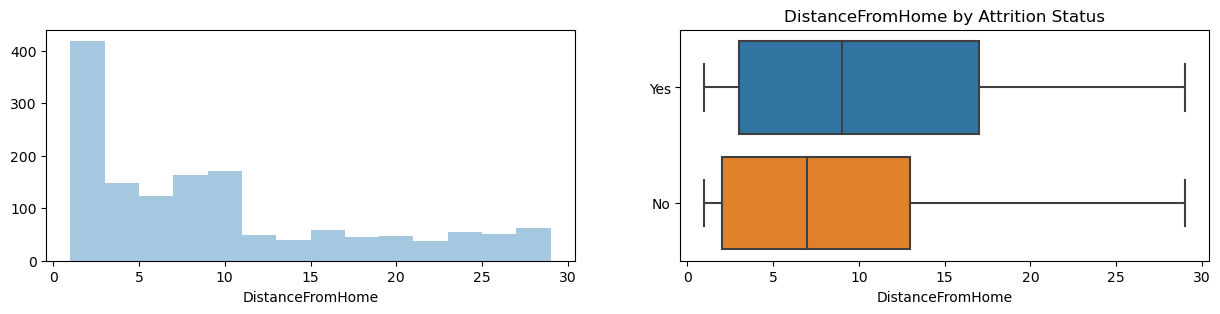

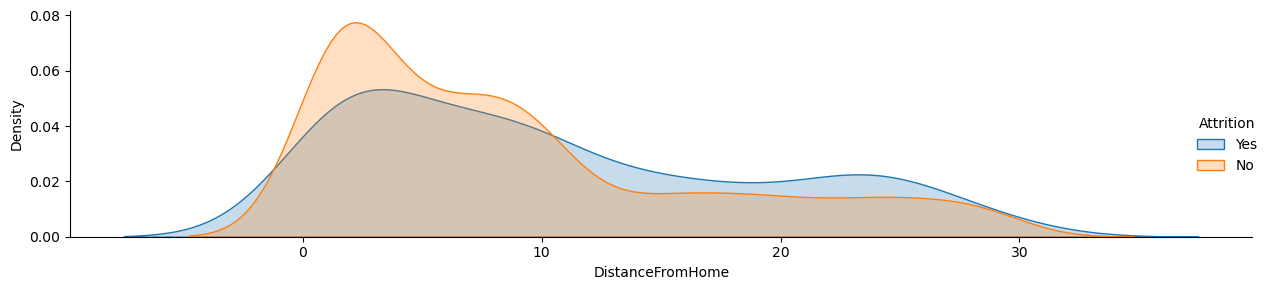

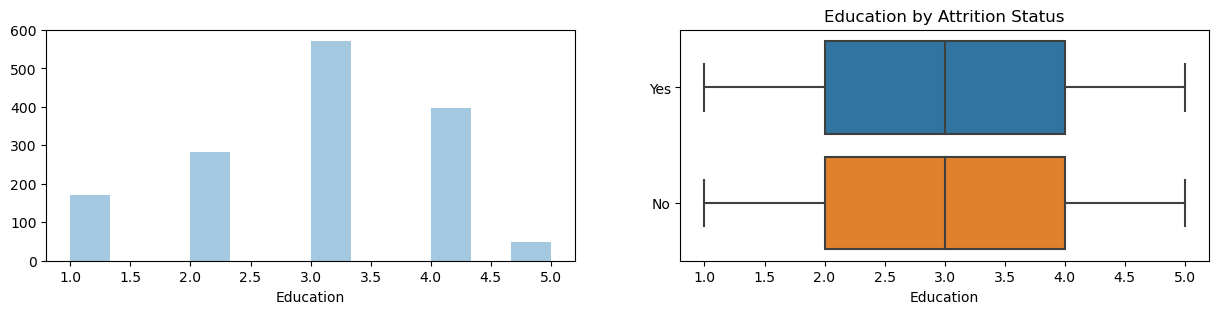

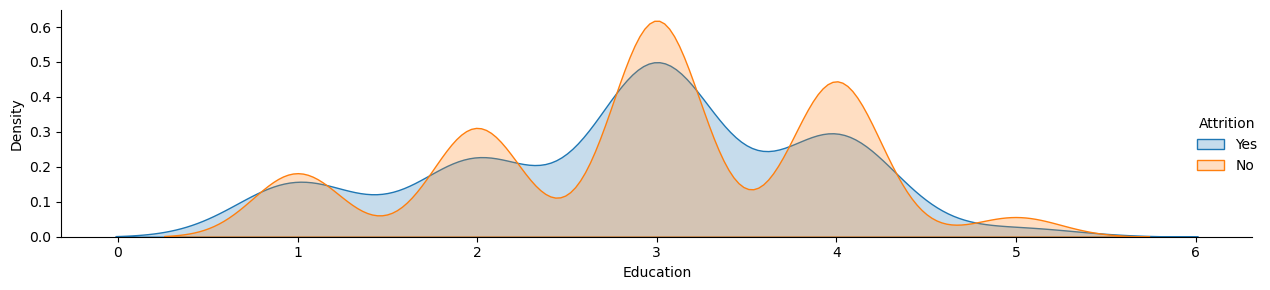

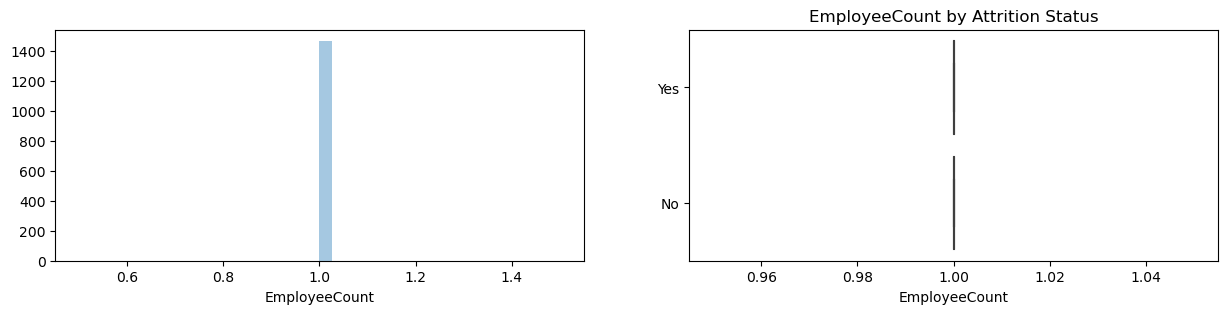

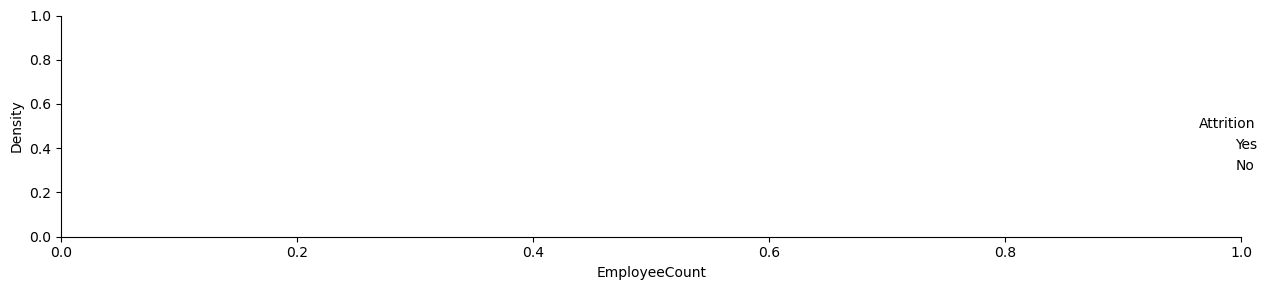

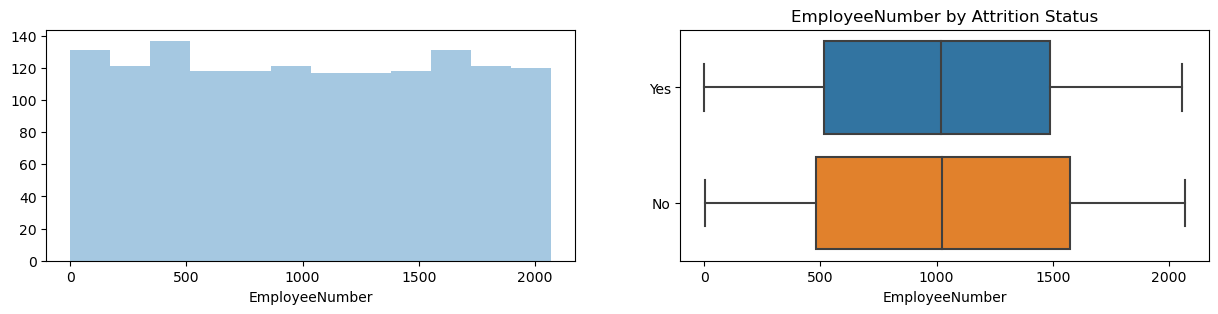

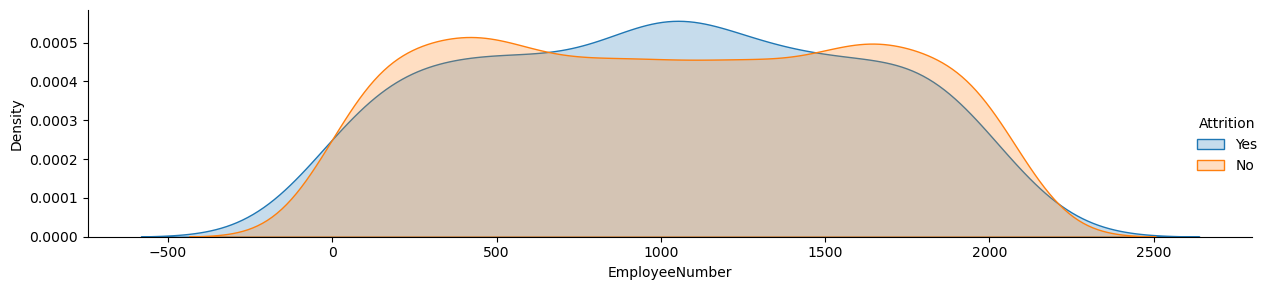

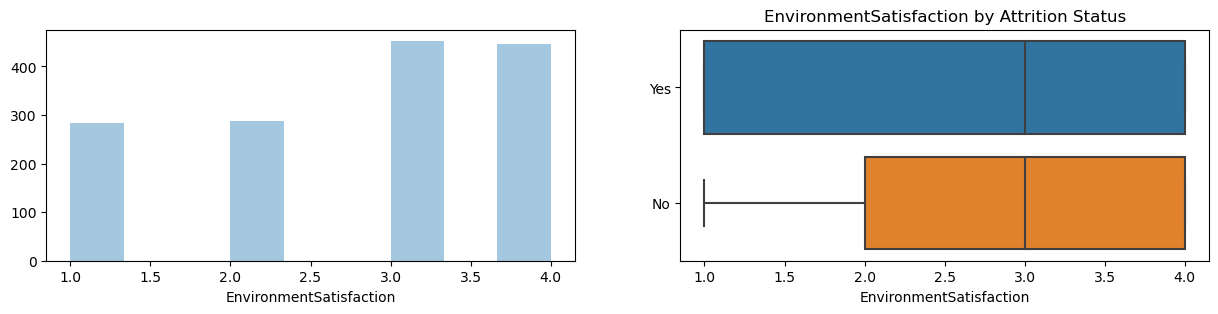

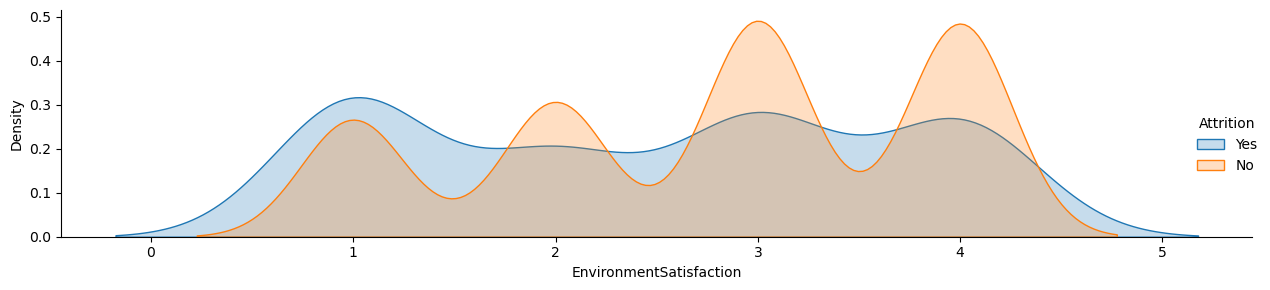

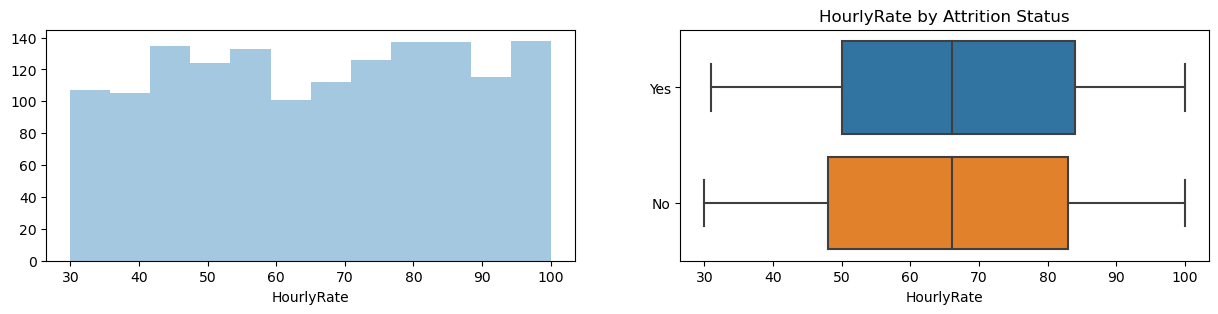

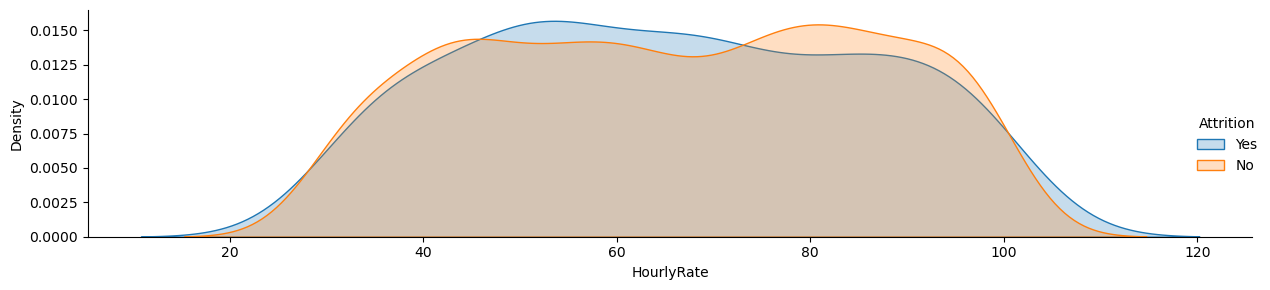

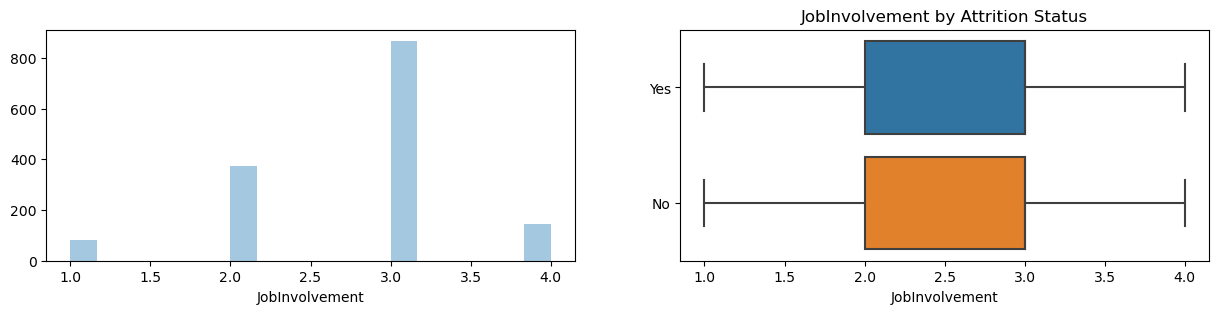

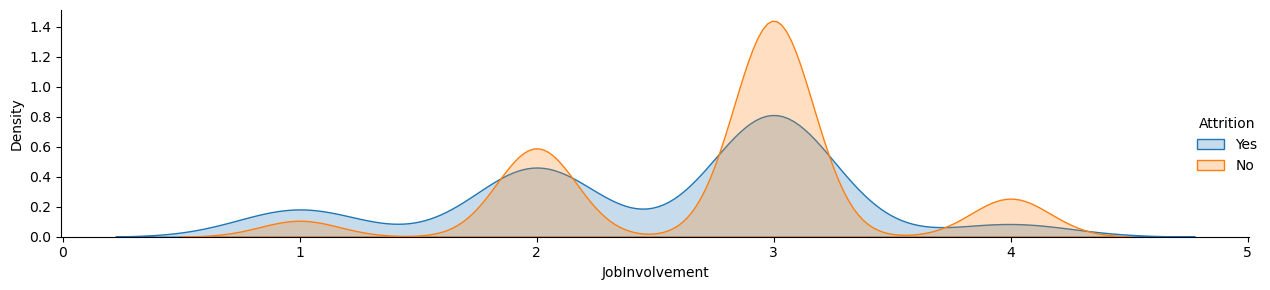

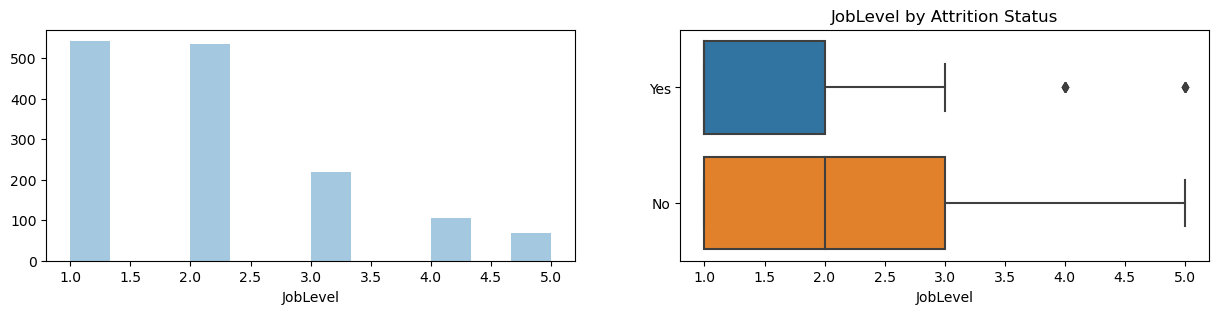

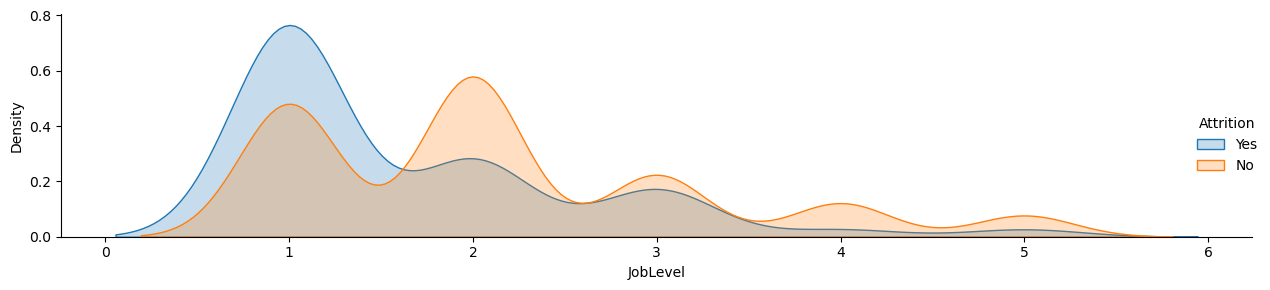

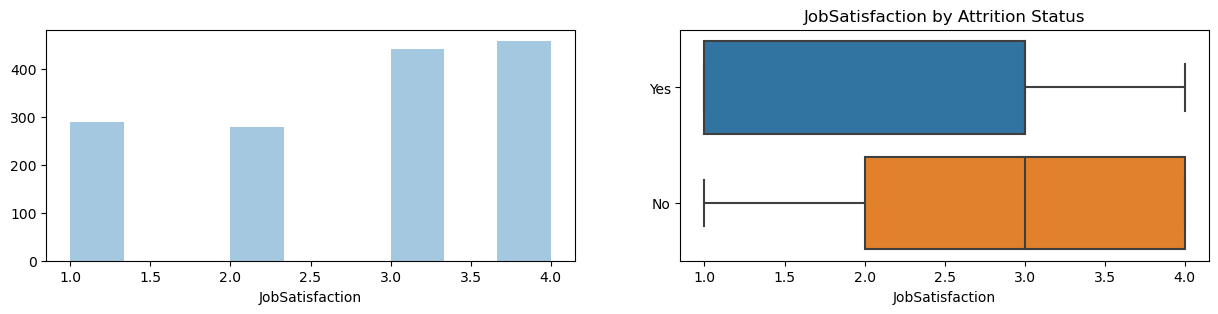

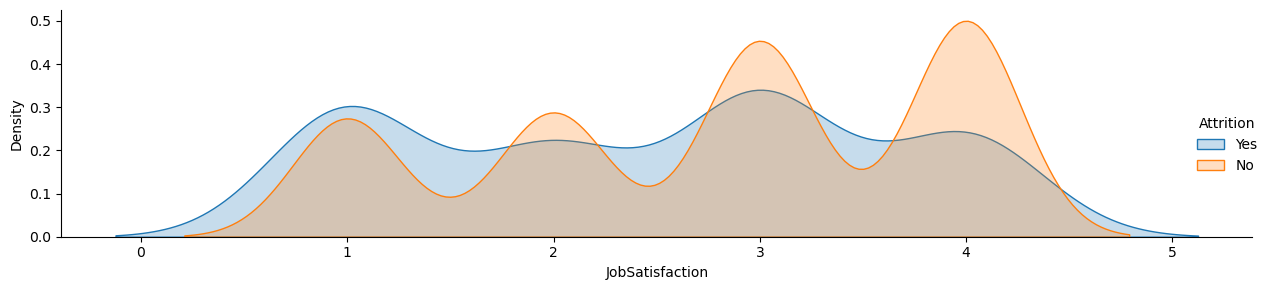

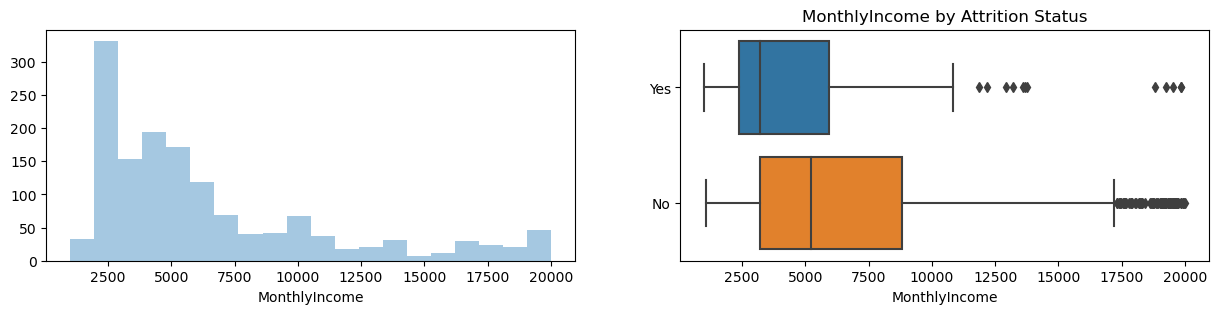

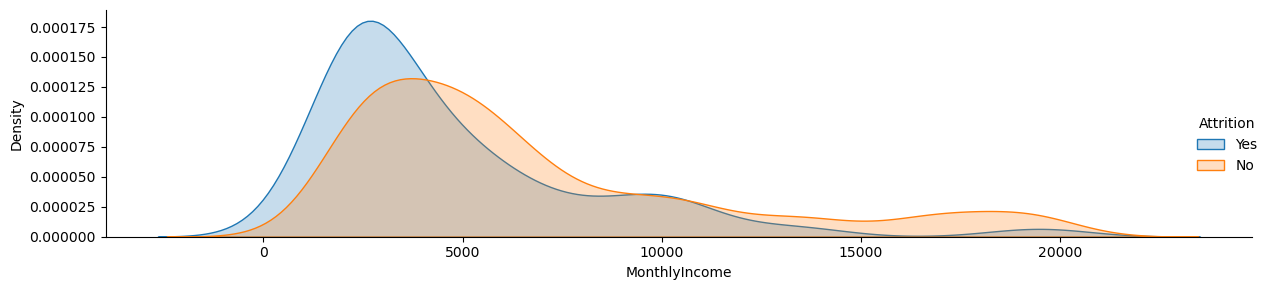

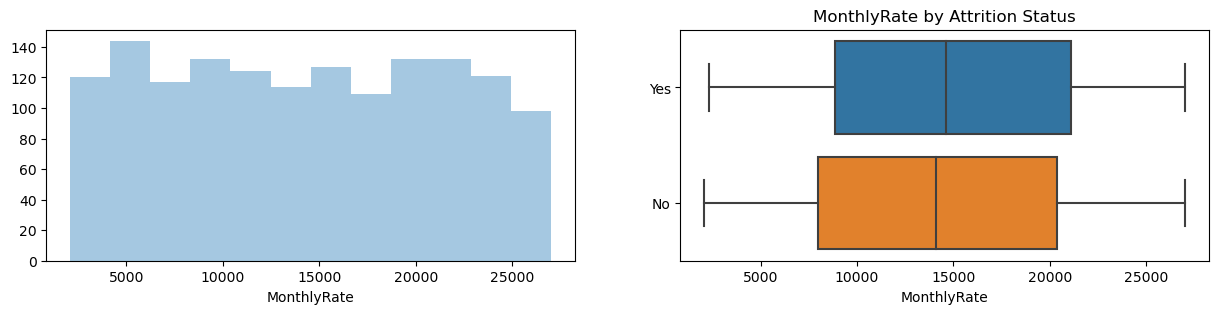

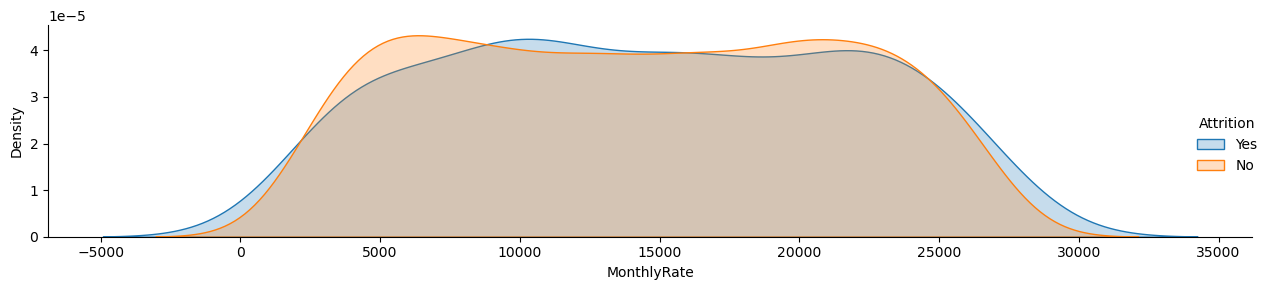

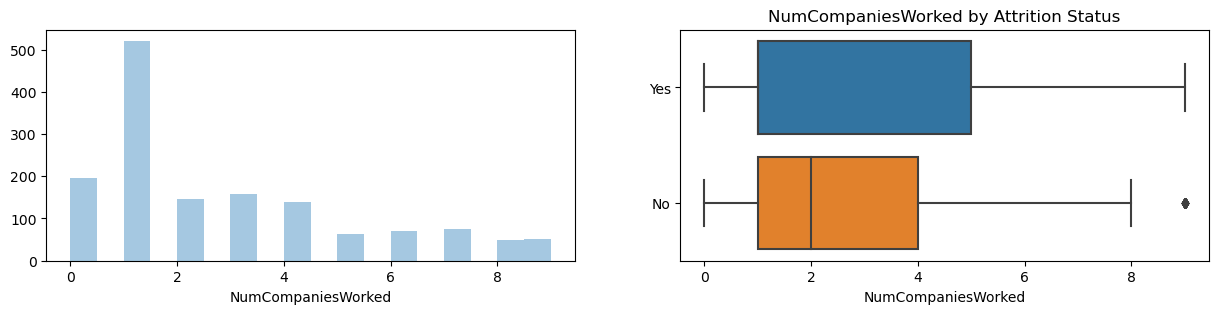

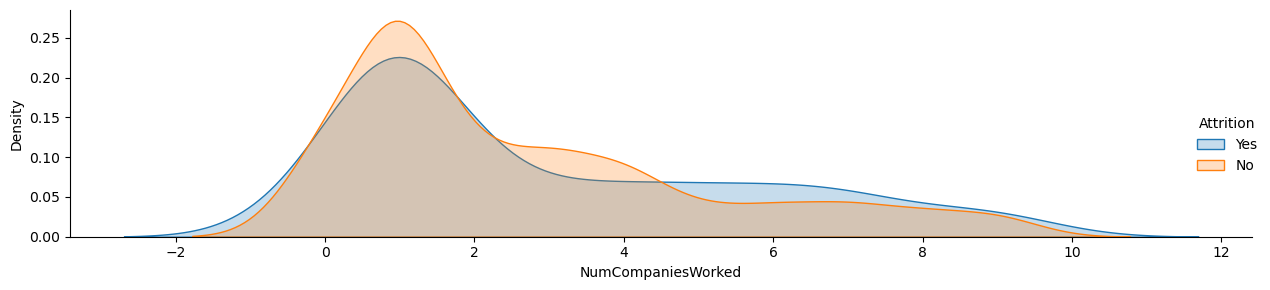

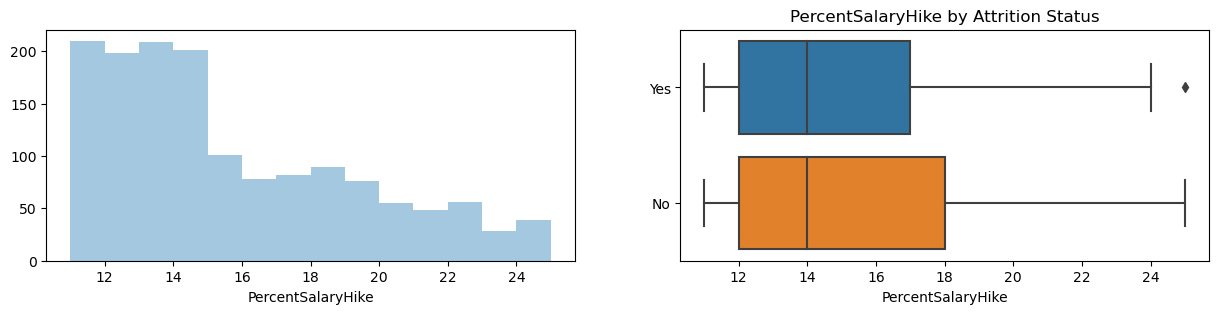

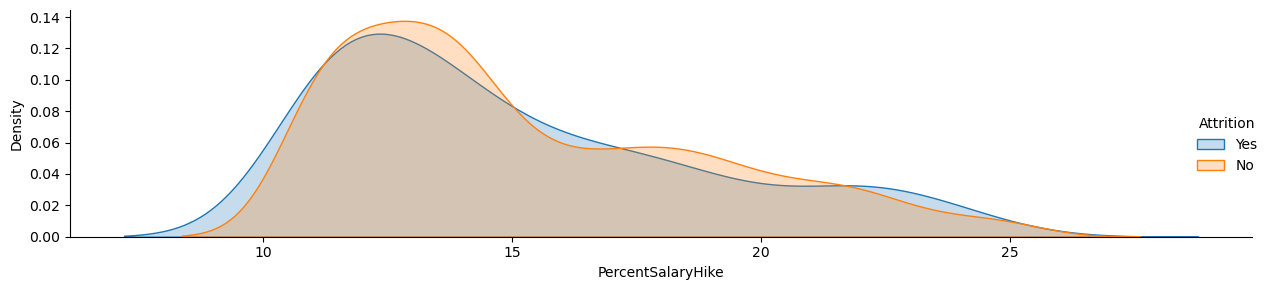

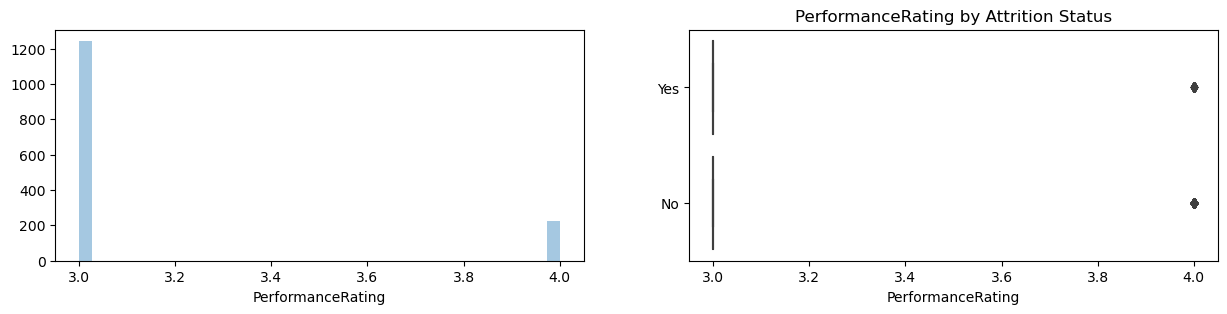

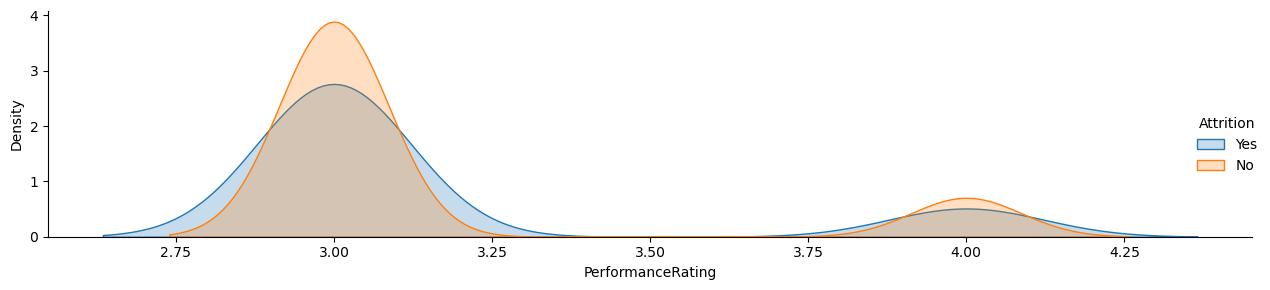

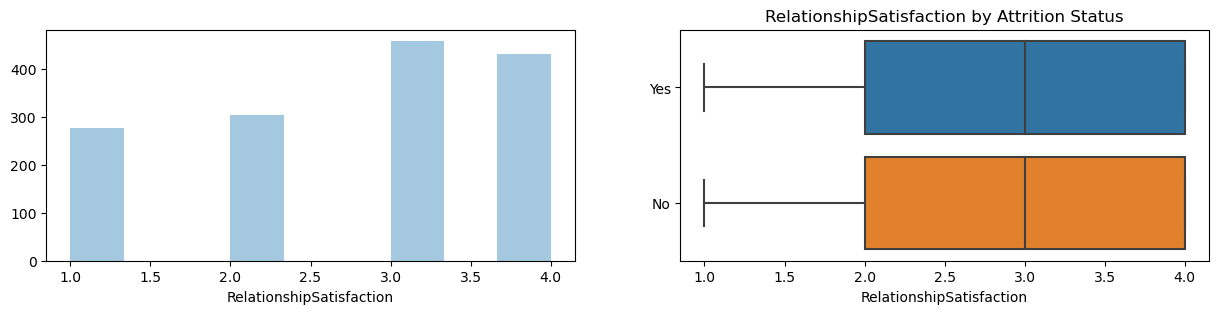

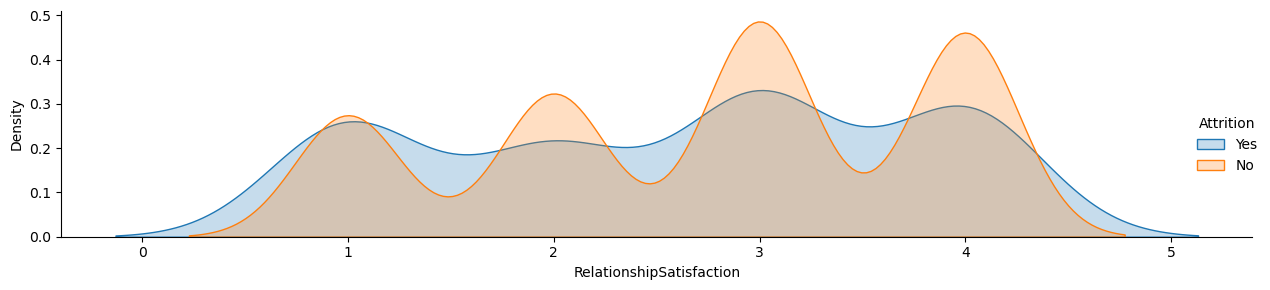

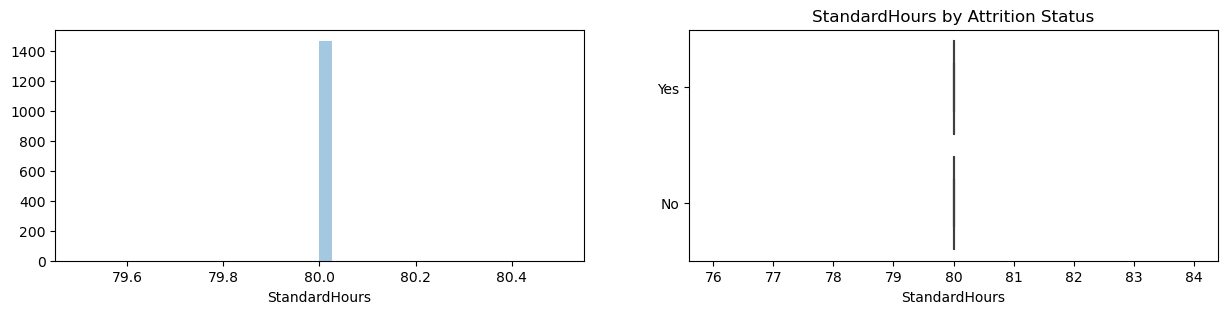

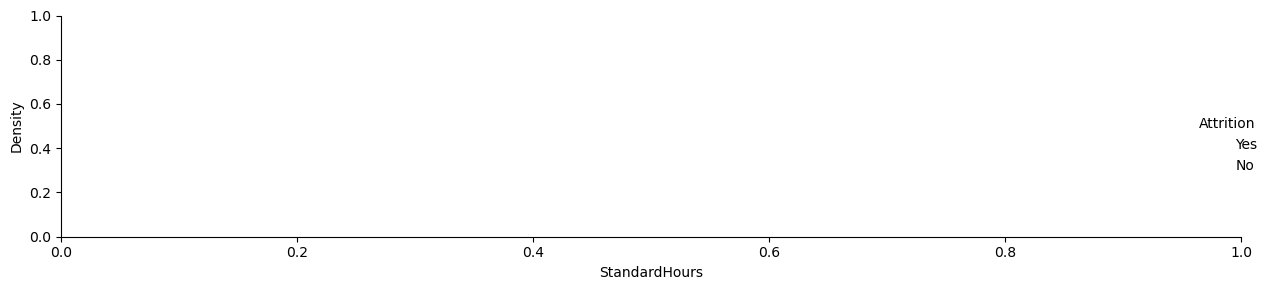

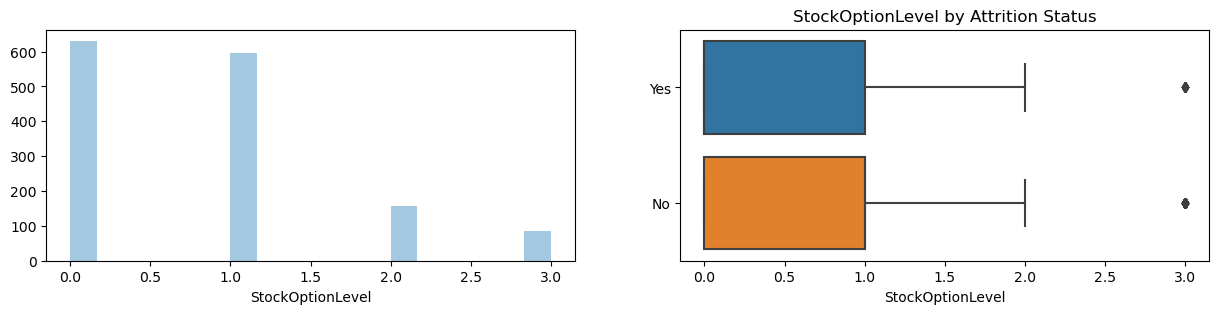

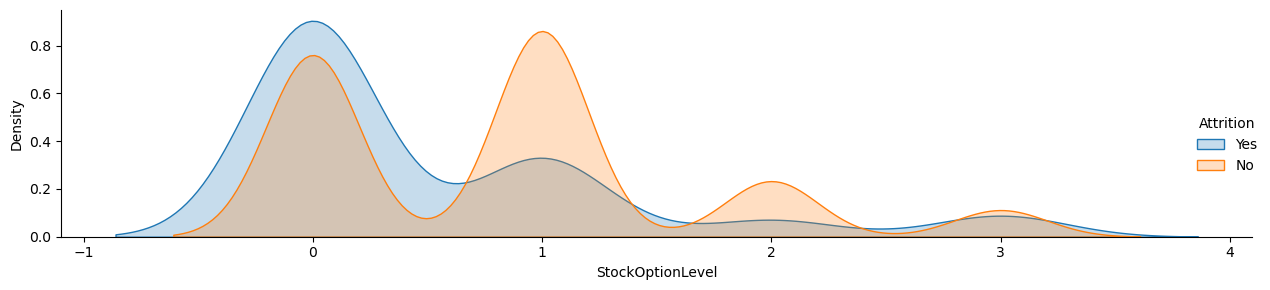

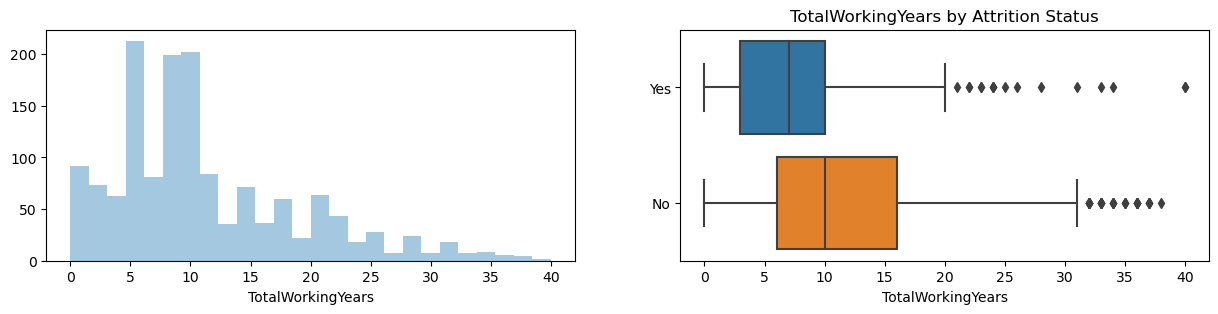

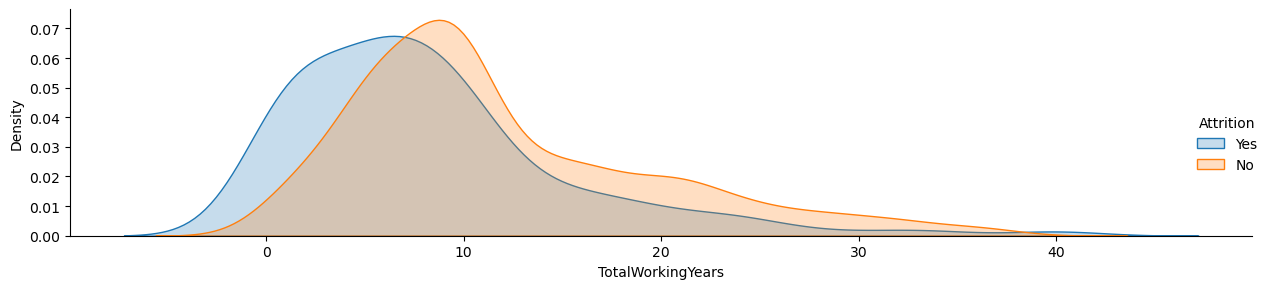

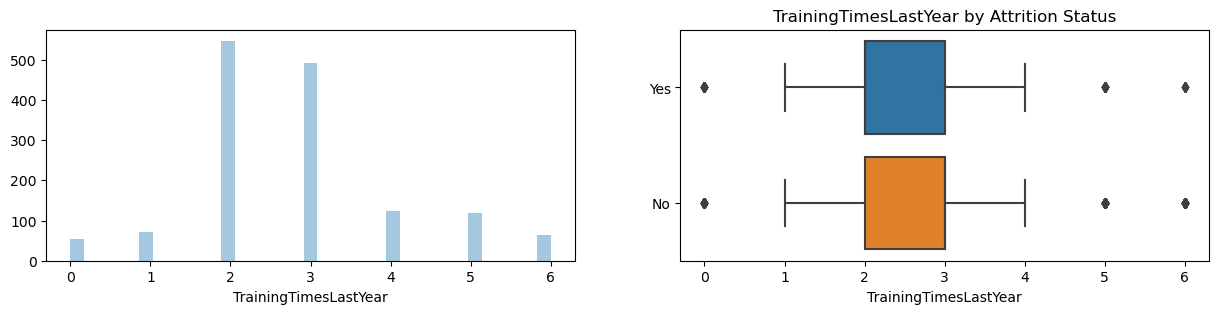

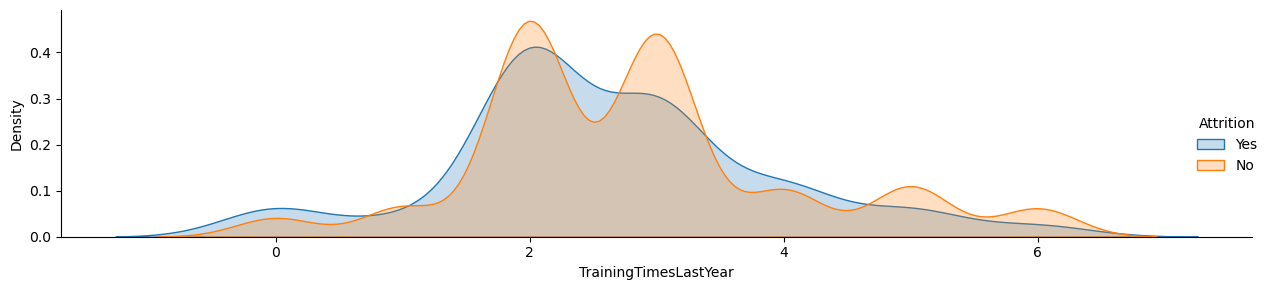

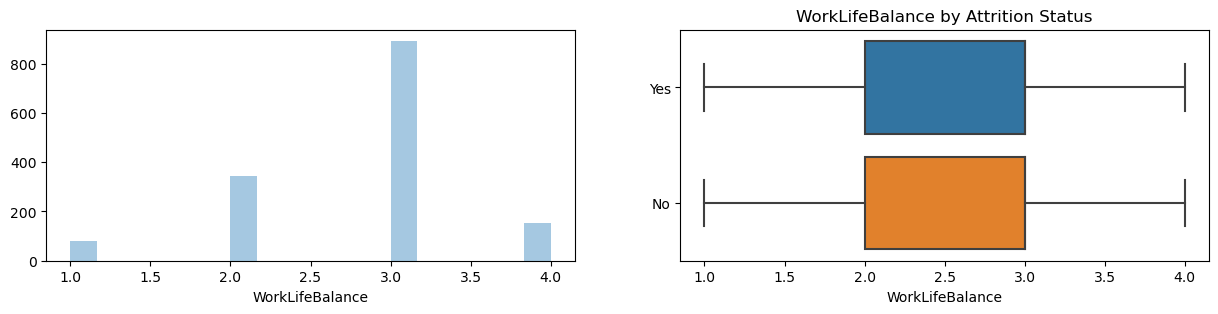

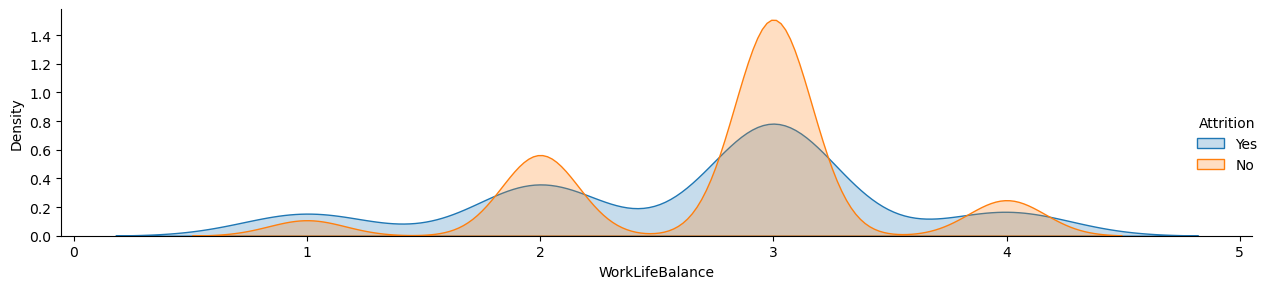

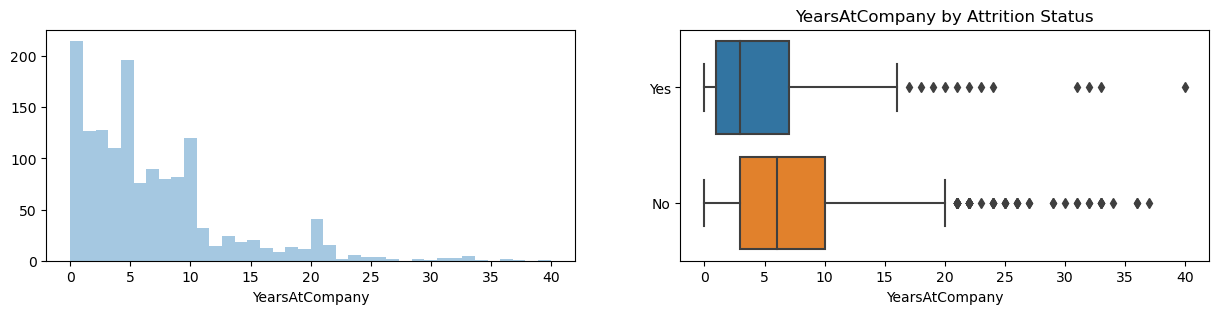

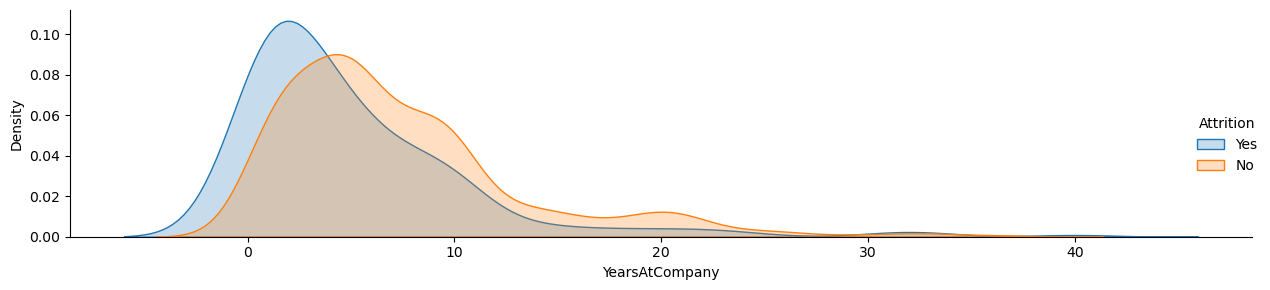

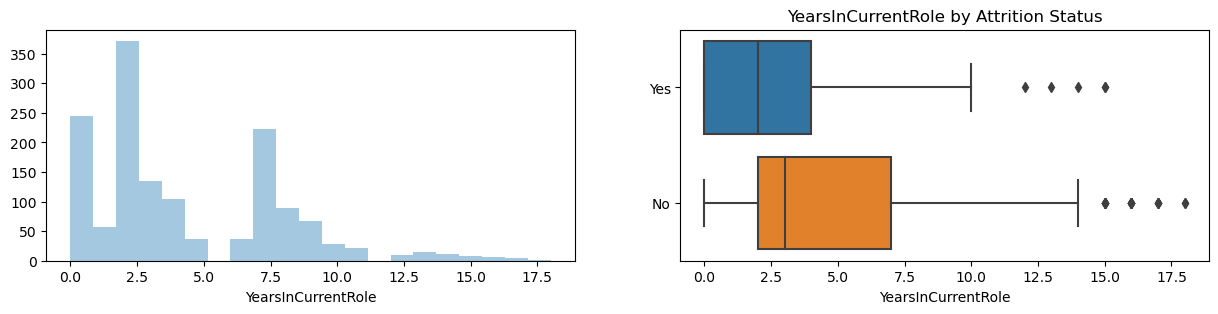

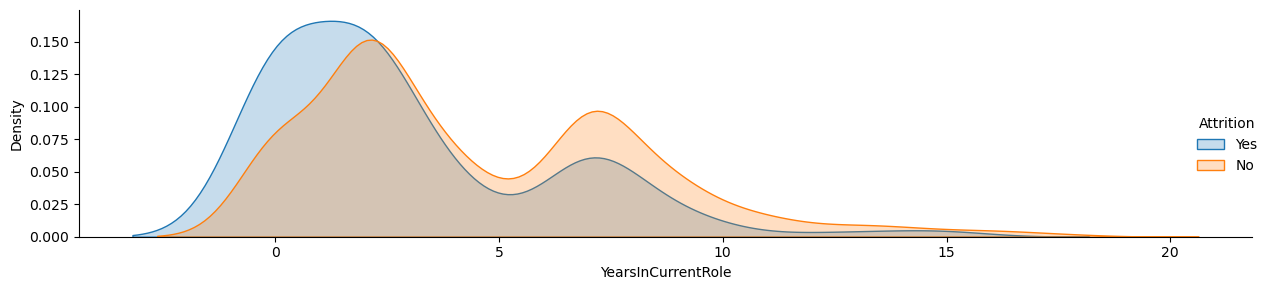

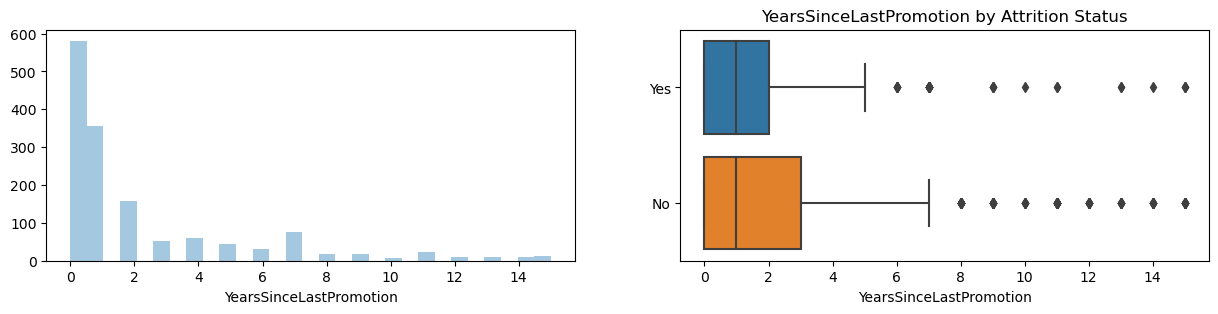

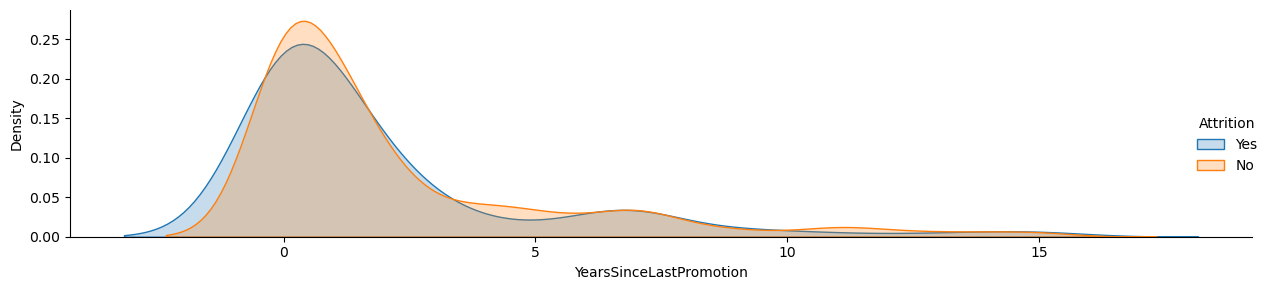

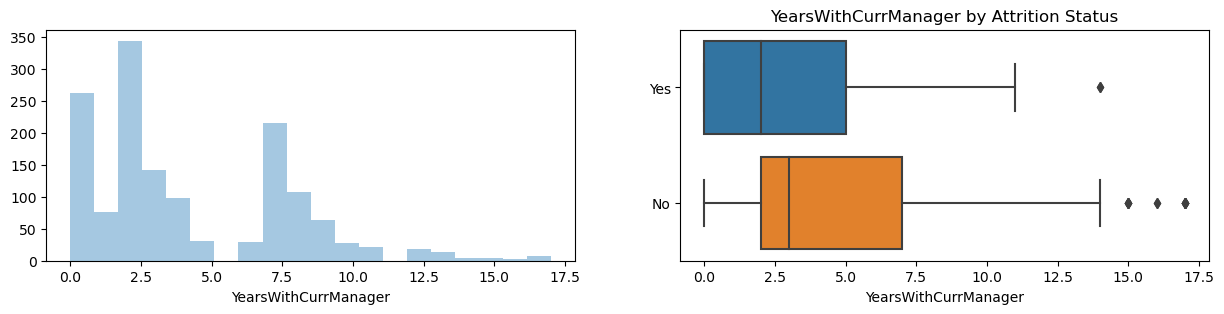

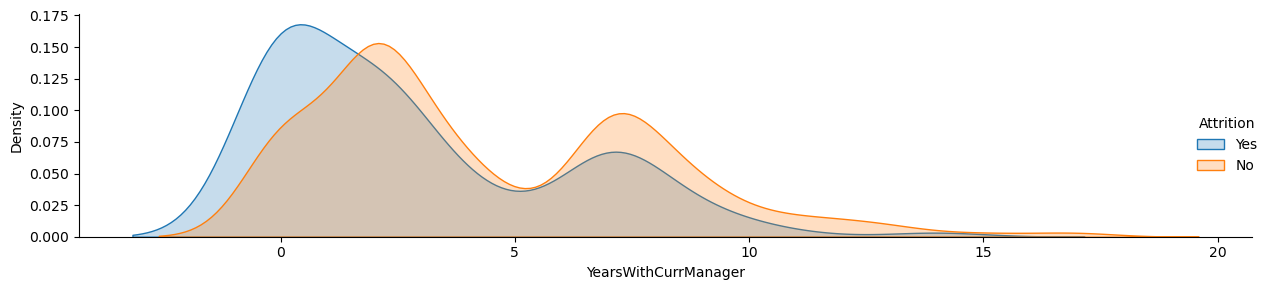

In [ ]:
numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
for plot_element in numerical_columns:
    plot_var(plot_element, plot_element, continuous=True)

## Data Visualization for Binary Variables

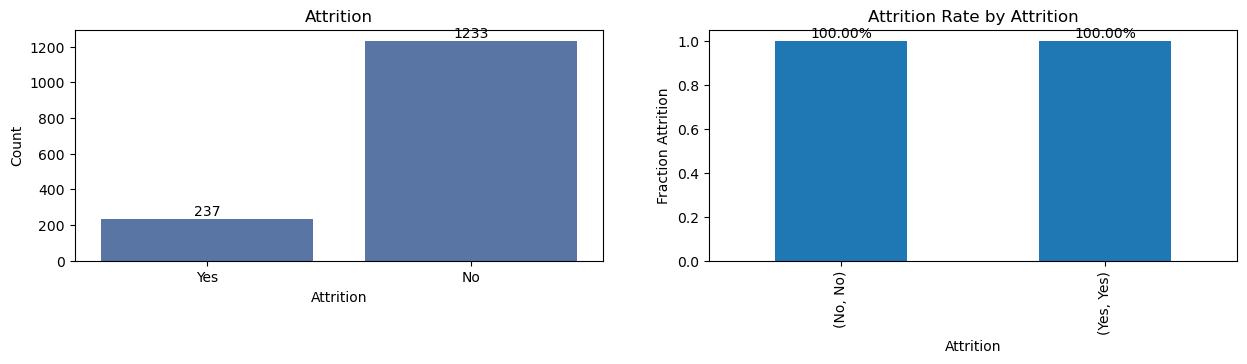

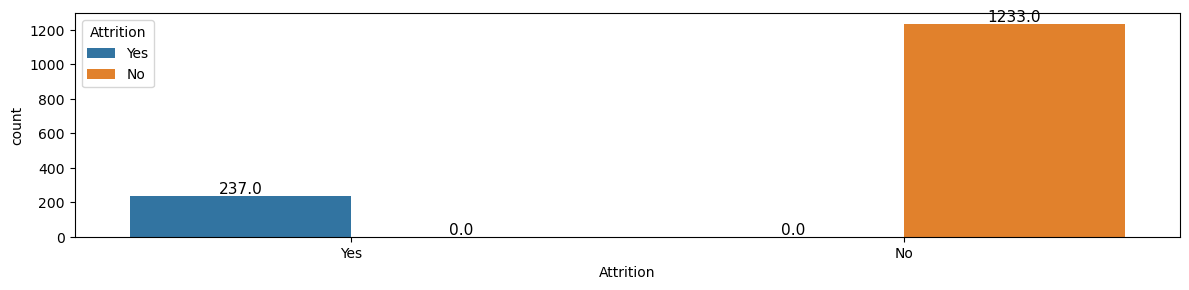

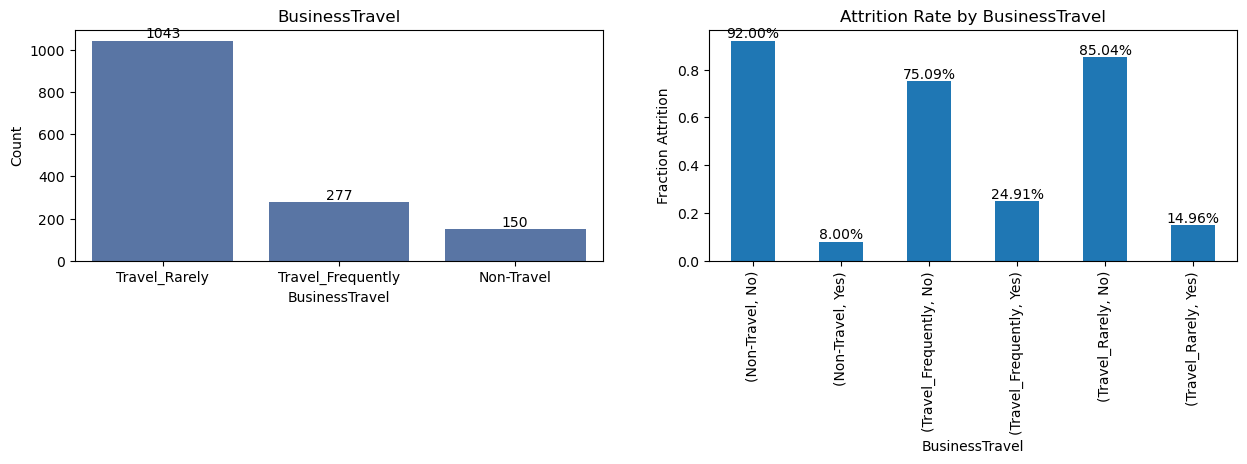

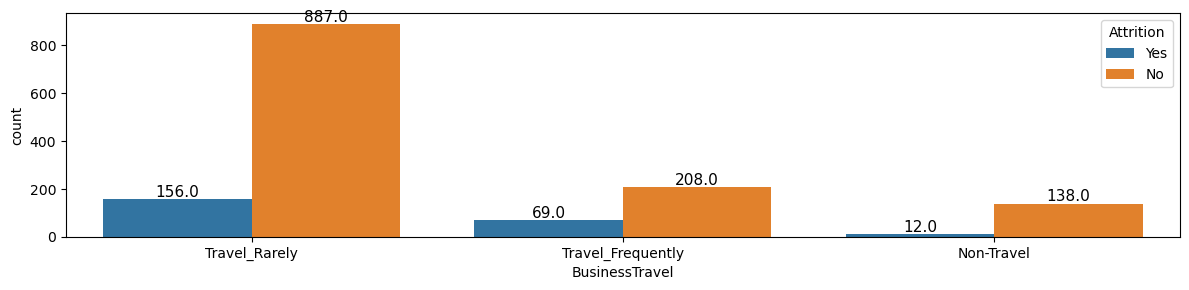

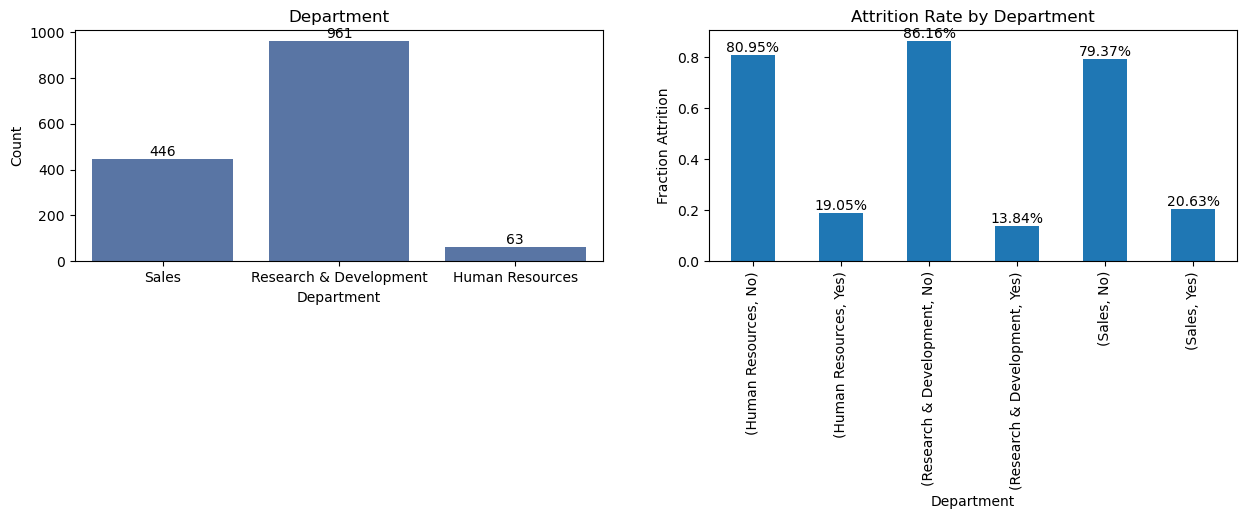

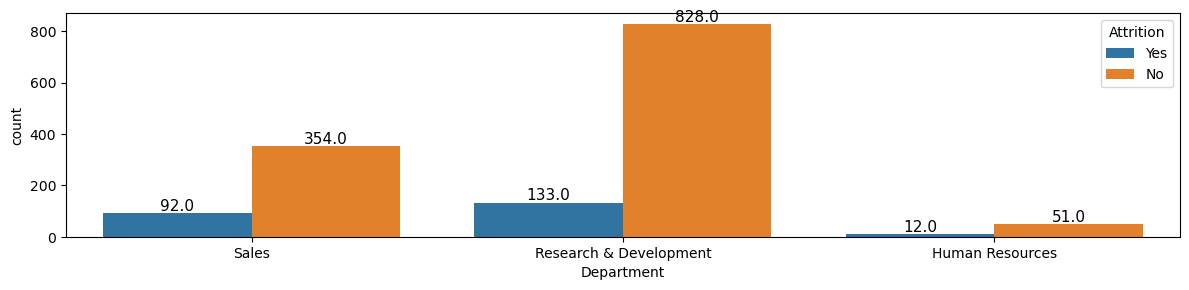

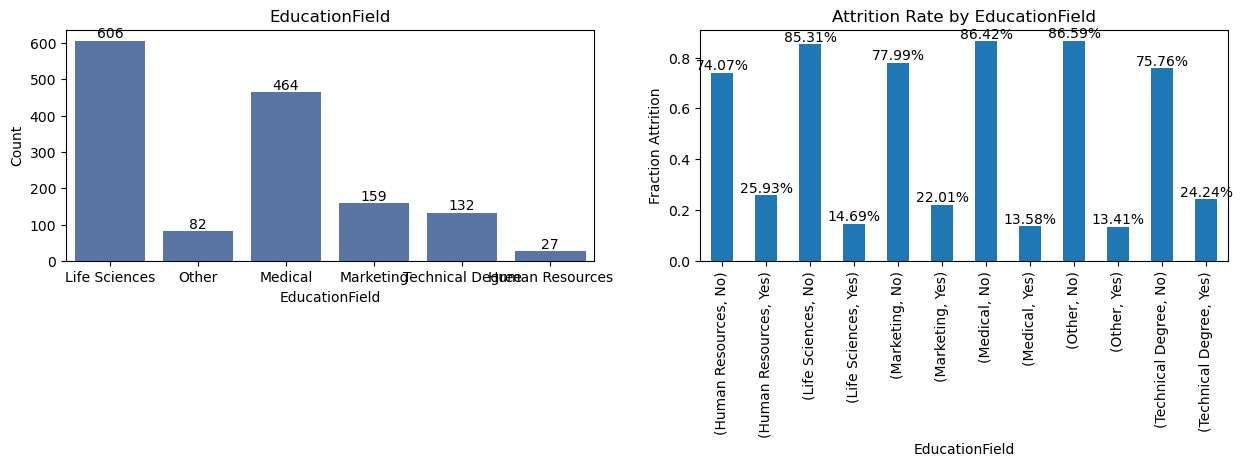

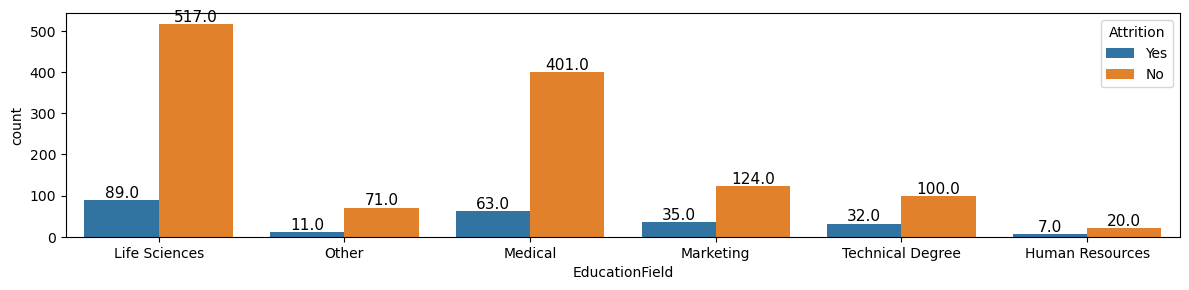

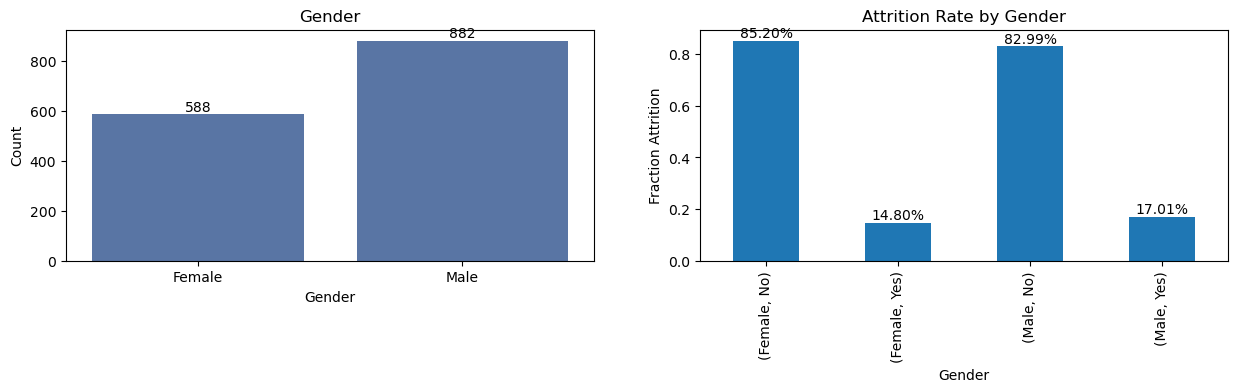

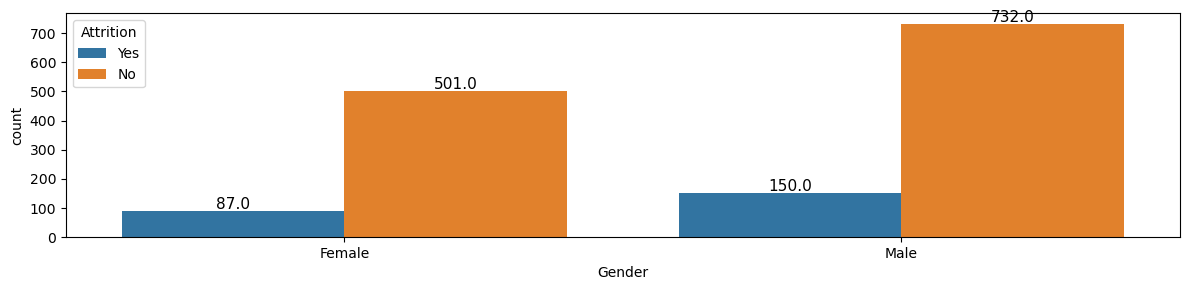

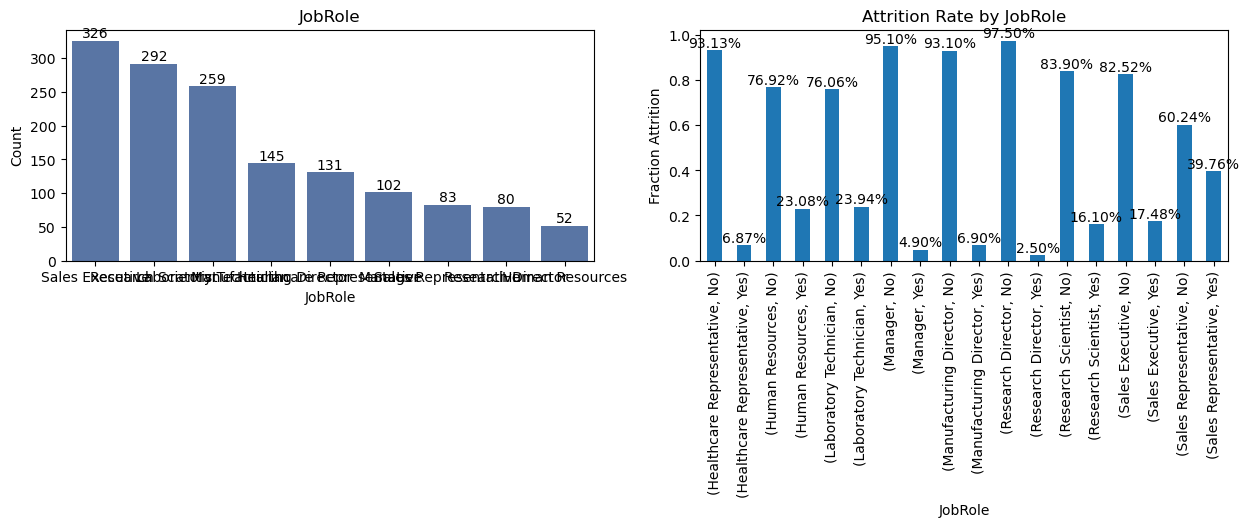

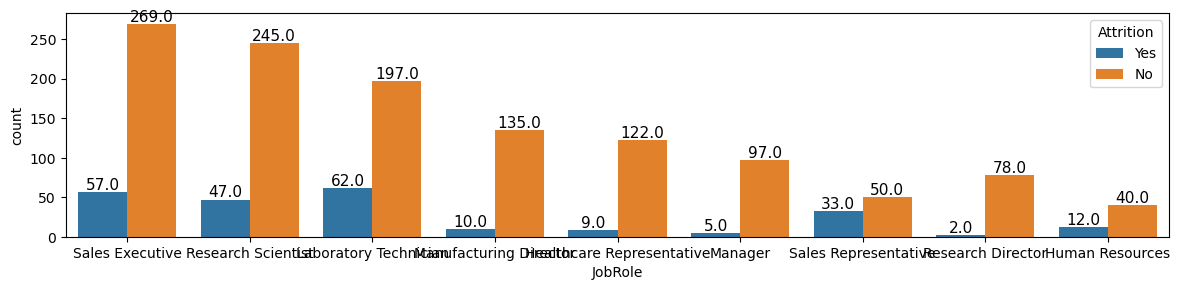

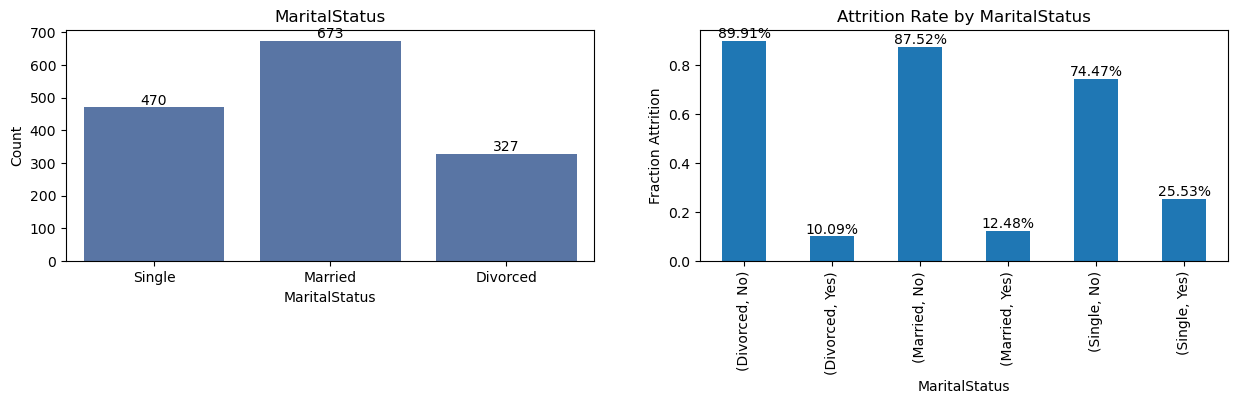

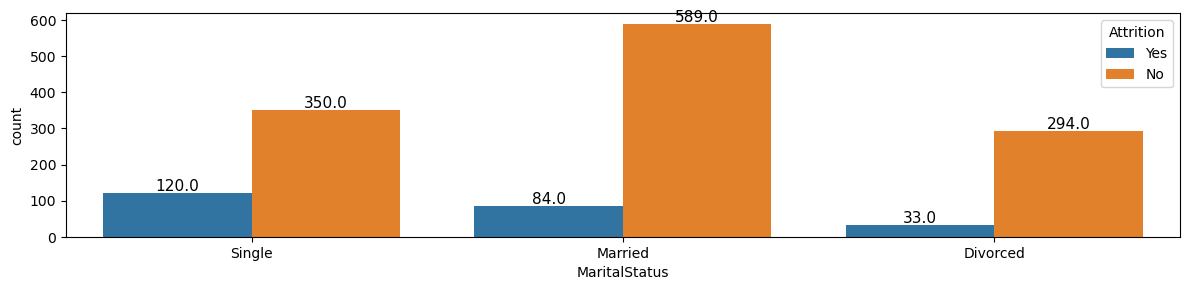

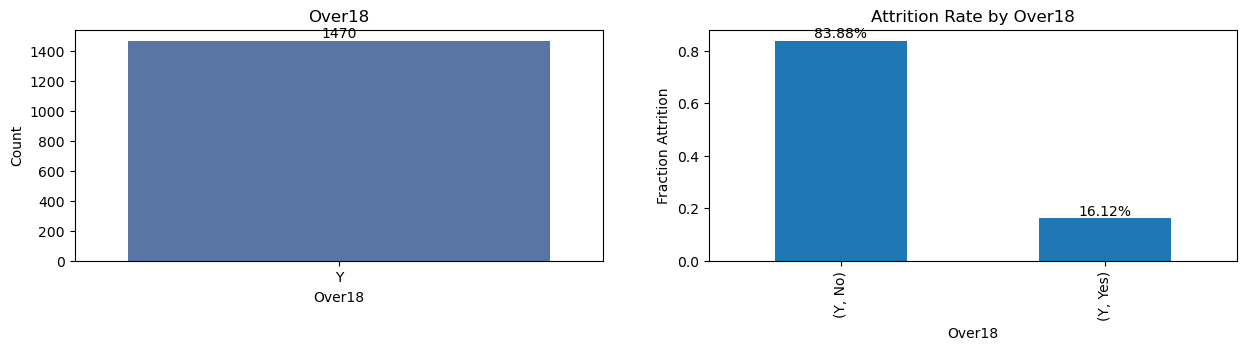

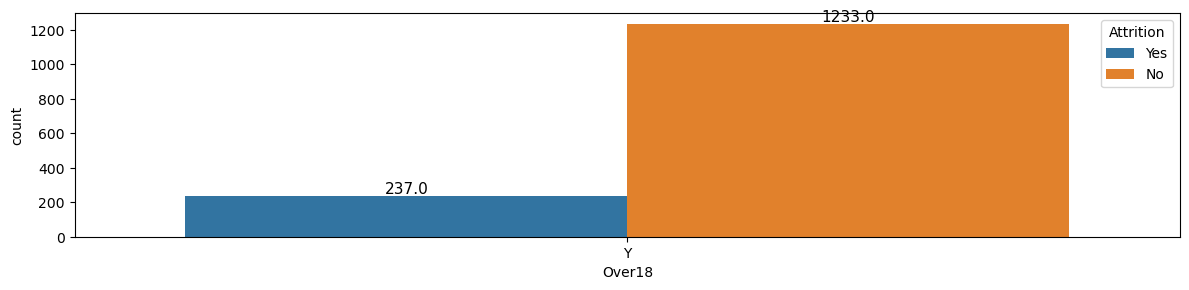

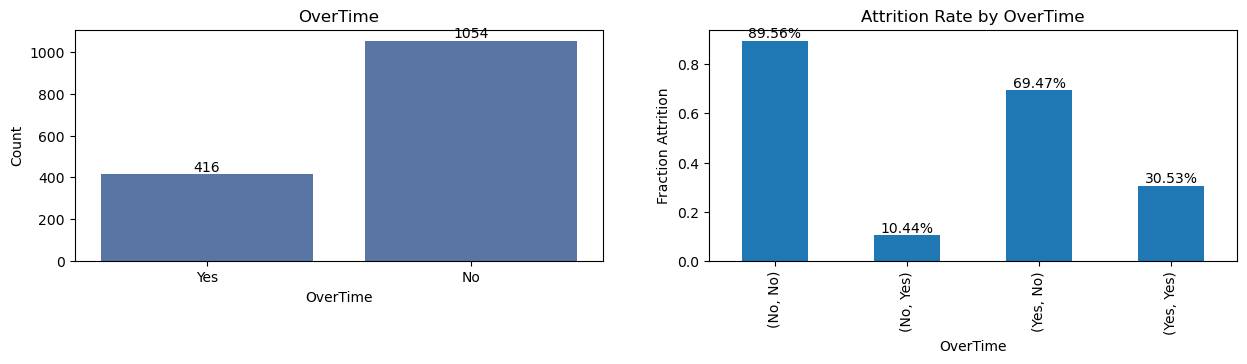

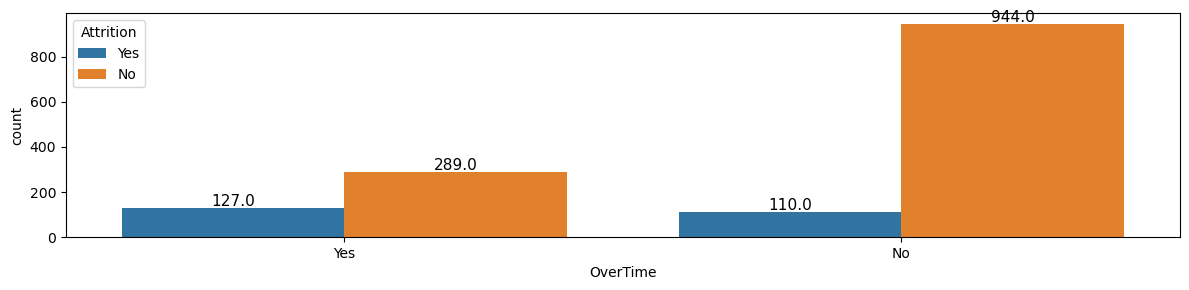

In [ ]:
categorical_columns = df.select_dtypes(include=['object',"category"]).columns.tolist()
for plot_element in categorical_columns:
    plot_var(plot_element, plot_element, continuous=False)

## Delete Variables from the dataframe with zero variance

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Assuming 'df' is your DataFrame

# Select only numerical columns
numerical_columns = df.select_dtypes(include='number').columns
df_numerical = df[numerical_columns]

# Use VarianceThreshold to remove features with zero variance
selector = VarianceThreshold(threshold=0)
df_filtered = pd.DataFrame(selector.fit_transform(df_numerical), columns=df_numerical.columns[selector.get_support()])

# Print the columns that were removed
removed_columns = df_numerical.columns[~selector.get_support()]
print(f"Columns removed with zero variance: {removed_columns}")

# Now df_filtered contains only numerical columns with non-zero variance

Columns removed with zero variance: Index(['EmployeeCount', 'StandardHours'], dtype='object')


In [ ]:
df=df.drop(removed_columns, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_24696\888636024.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


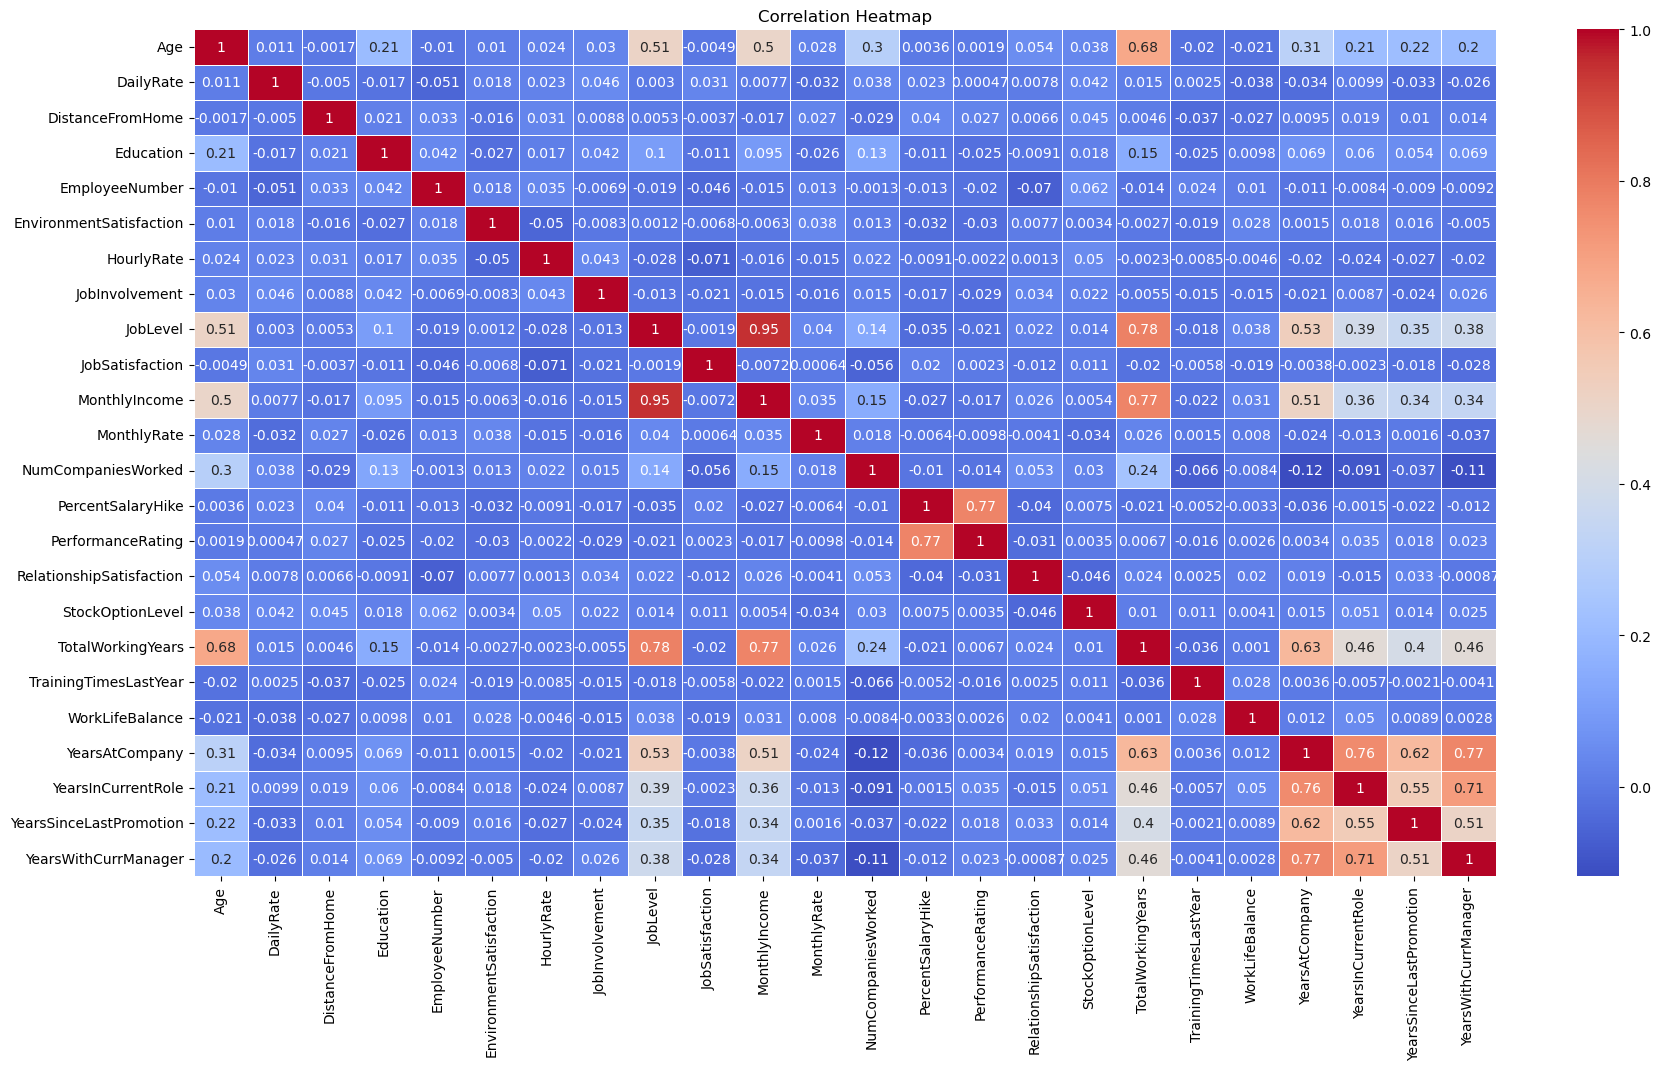

In [ ]:
# Calculate the correlation matrix

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', low=0.15)

# Create a heatmap to visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(21, 11))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Handle Missing Data:**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (if any)
# Example: Fill missing values with the mean of the column
df['Age'].fillna(df['Age'].mean(), inplace=True)


Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager   

# **Heatmap**

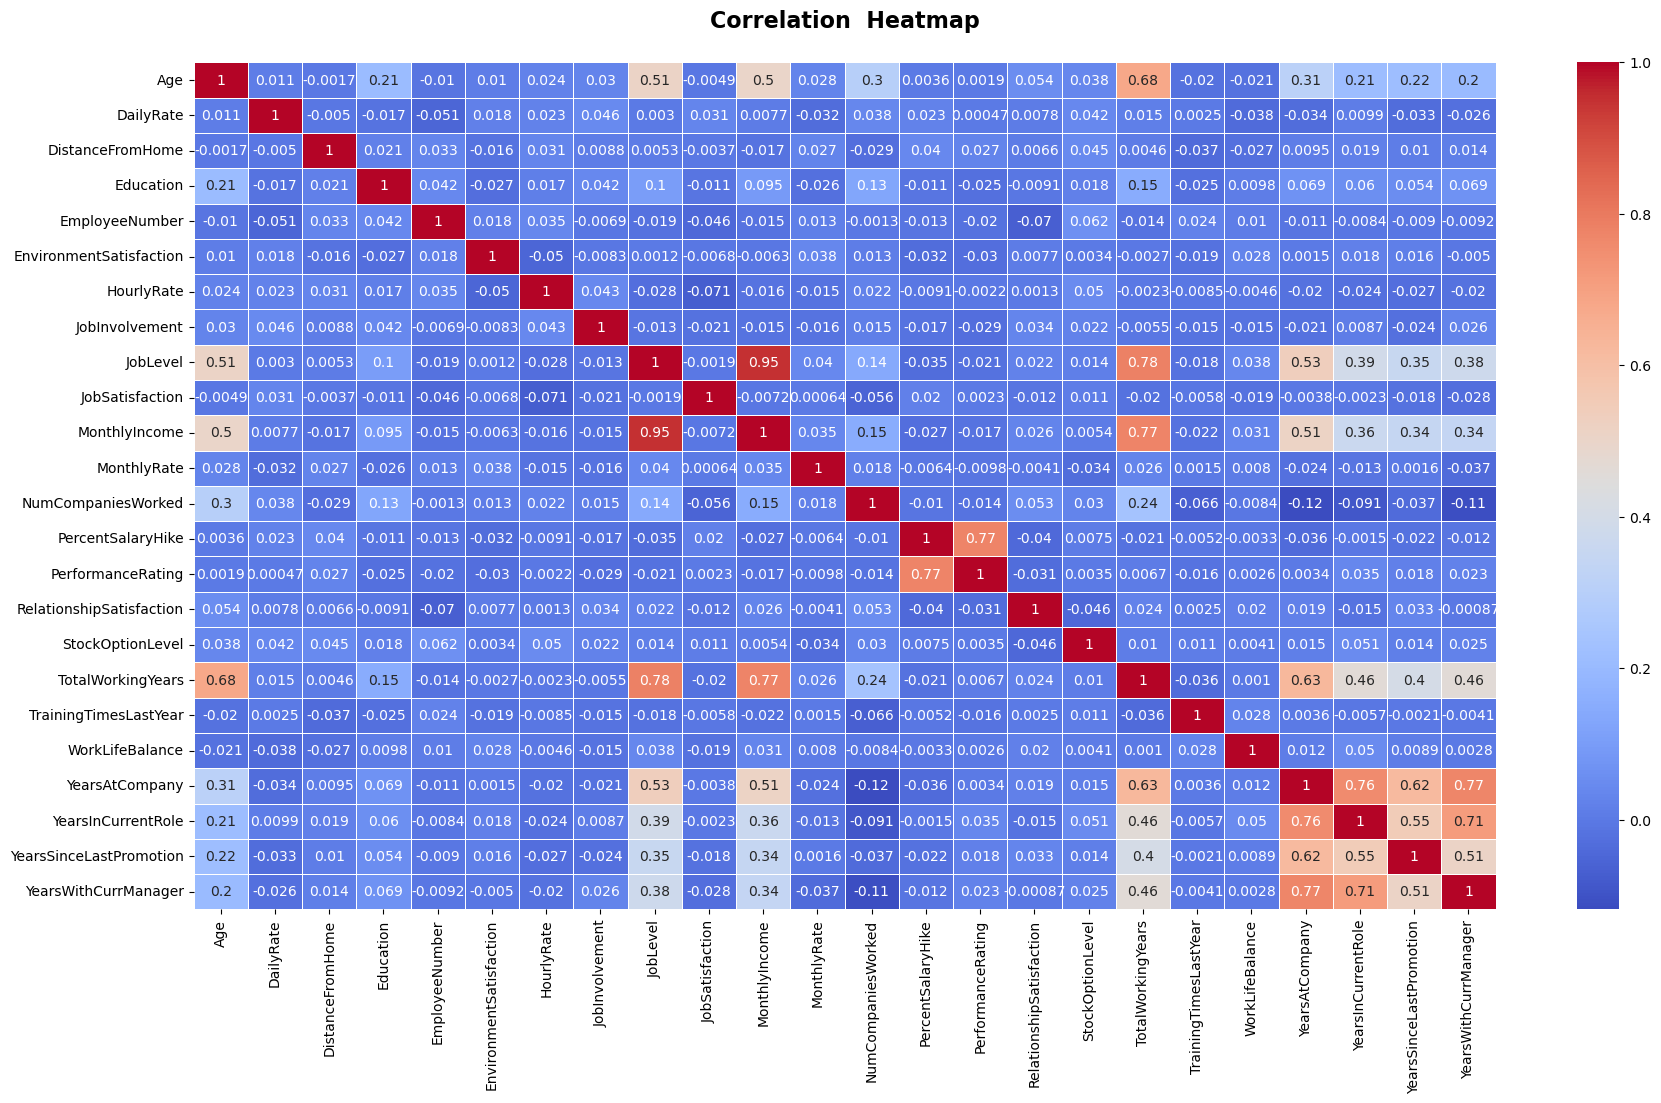

In [ ]:
# Create a heatmap
import seaborn as sns
plt.figure(figsize=(21, 11))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
#annot=True adds annotations (correlation values) to the cells.
#cmap='coolwarm' specifies the color map for the heatmap. You can choose a different colormap if desired.
#linewidths=0.5 sets the linewidth between cells in the heatmap



plt.title("Correlation  Heatmap\n", fontsize=16, fontweight='bold')
plt.show()



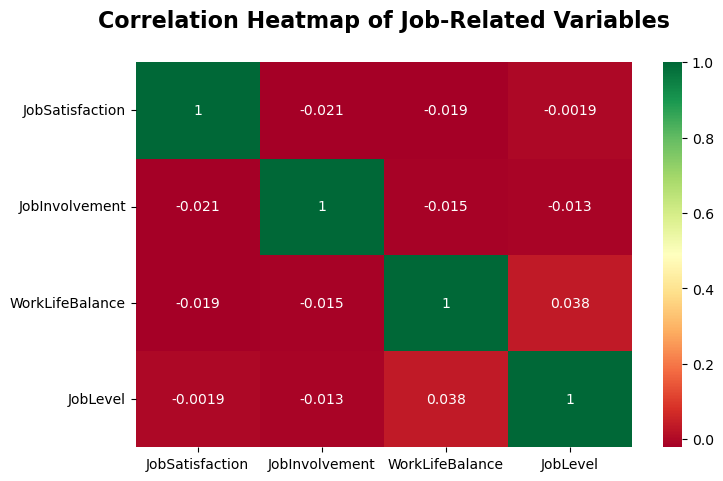

In [ ]:
dfnew = ['JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'JobLevel']
X = df[dfnew]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")


plt.title('Correlation Heatmap of Job-Related Variables\n', fontsize=16, fontweight='bold')

plt.show()


# **Data Distribution Visualization:**

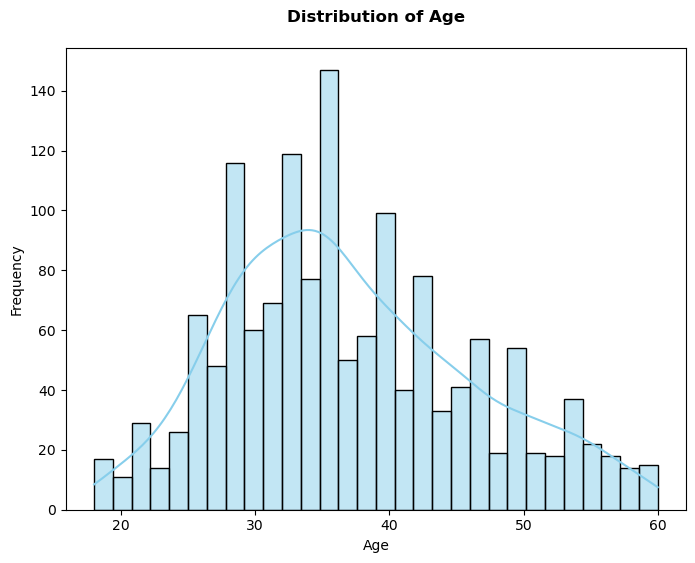

In [ ]:
#Visualize the distribution of 'Age' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age\n', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# **Outlier Detection:**

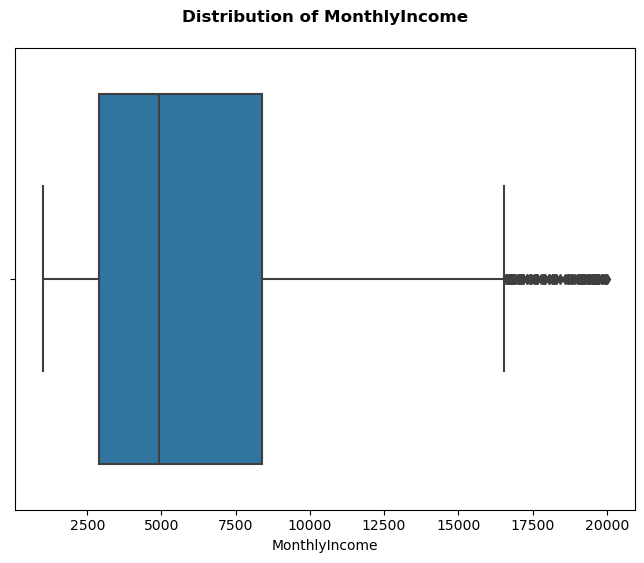

In [ ]:
# Visualize outliers in 'MonthlyIncome' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Distribution of MonthlyIncome\n', fontweight='bold')
plt.xlabel('MonthlyIncome')
plt.show()

# Cap outliers using winsorization
from scipy.stats.mstats import winsorize
df['MonthlyIncome'] = winsorize(df['MonthlyIncome'], limits=[0.05, 0.05])


# **Data Exploration:**


>Explore relationships between variables through additional visualizations or statistical tests.



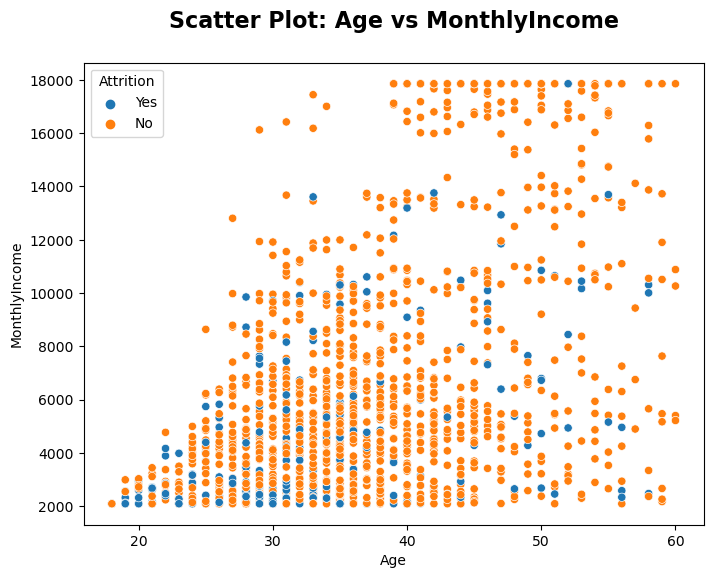

In [ ]:
#  Explore the relationship between 'Age' and 'MonthlyIncome'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', data=df, hue='Attrition')
plt.title('Scatter Plot: Age vs MonthlyIncome\n', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()


**#2-D Kernel Density Estimation (KDE) Plot**

It is a non-parametric way to estimate the probability density function of a random variable. In simpler terms, it's a method used to visualize the distribution of a dataset.

C:\Users\HP\AppData\Local\Temp\ipykernel_24696\1433872456.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[axes_x, axes_y])
C:\Users\HP\AppData\Local\Temp\ipykernel_24696\1433872456.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[axes_x, axes_y])
C:\Users\HP\AppData\Local\Temp\ipykernel_24696\1433872456.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[axes_x, axes_y])
C:\Users\HP\AppData\Local\Temp\ipykernel_24696\1433872456.py:17: FutureWarning: 

`shade` is now deprecated in favor of `

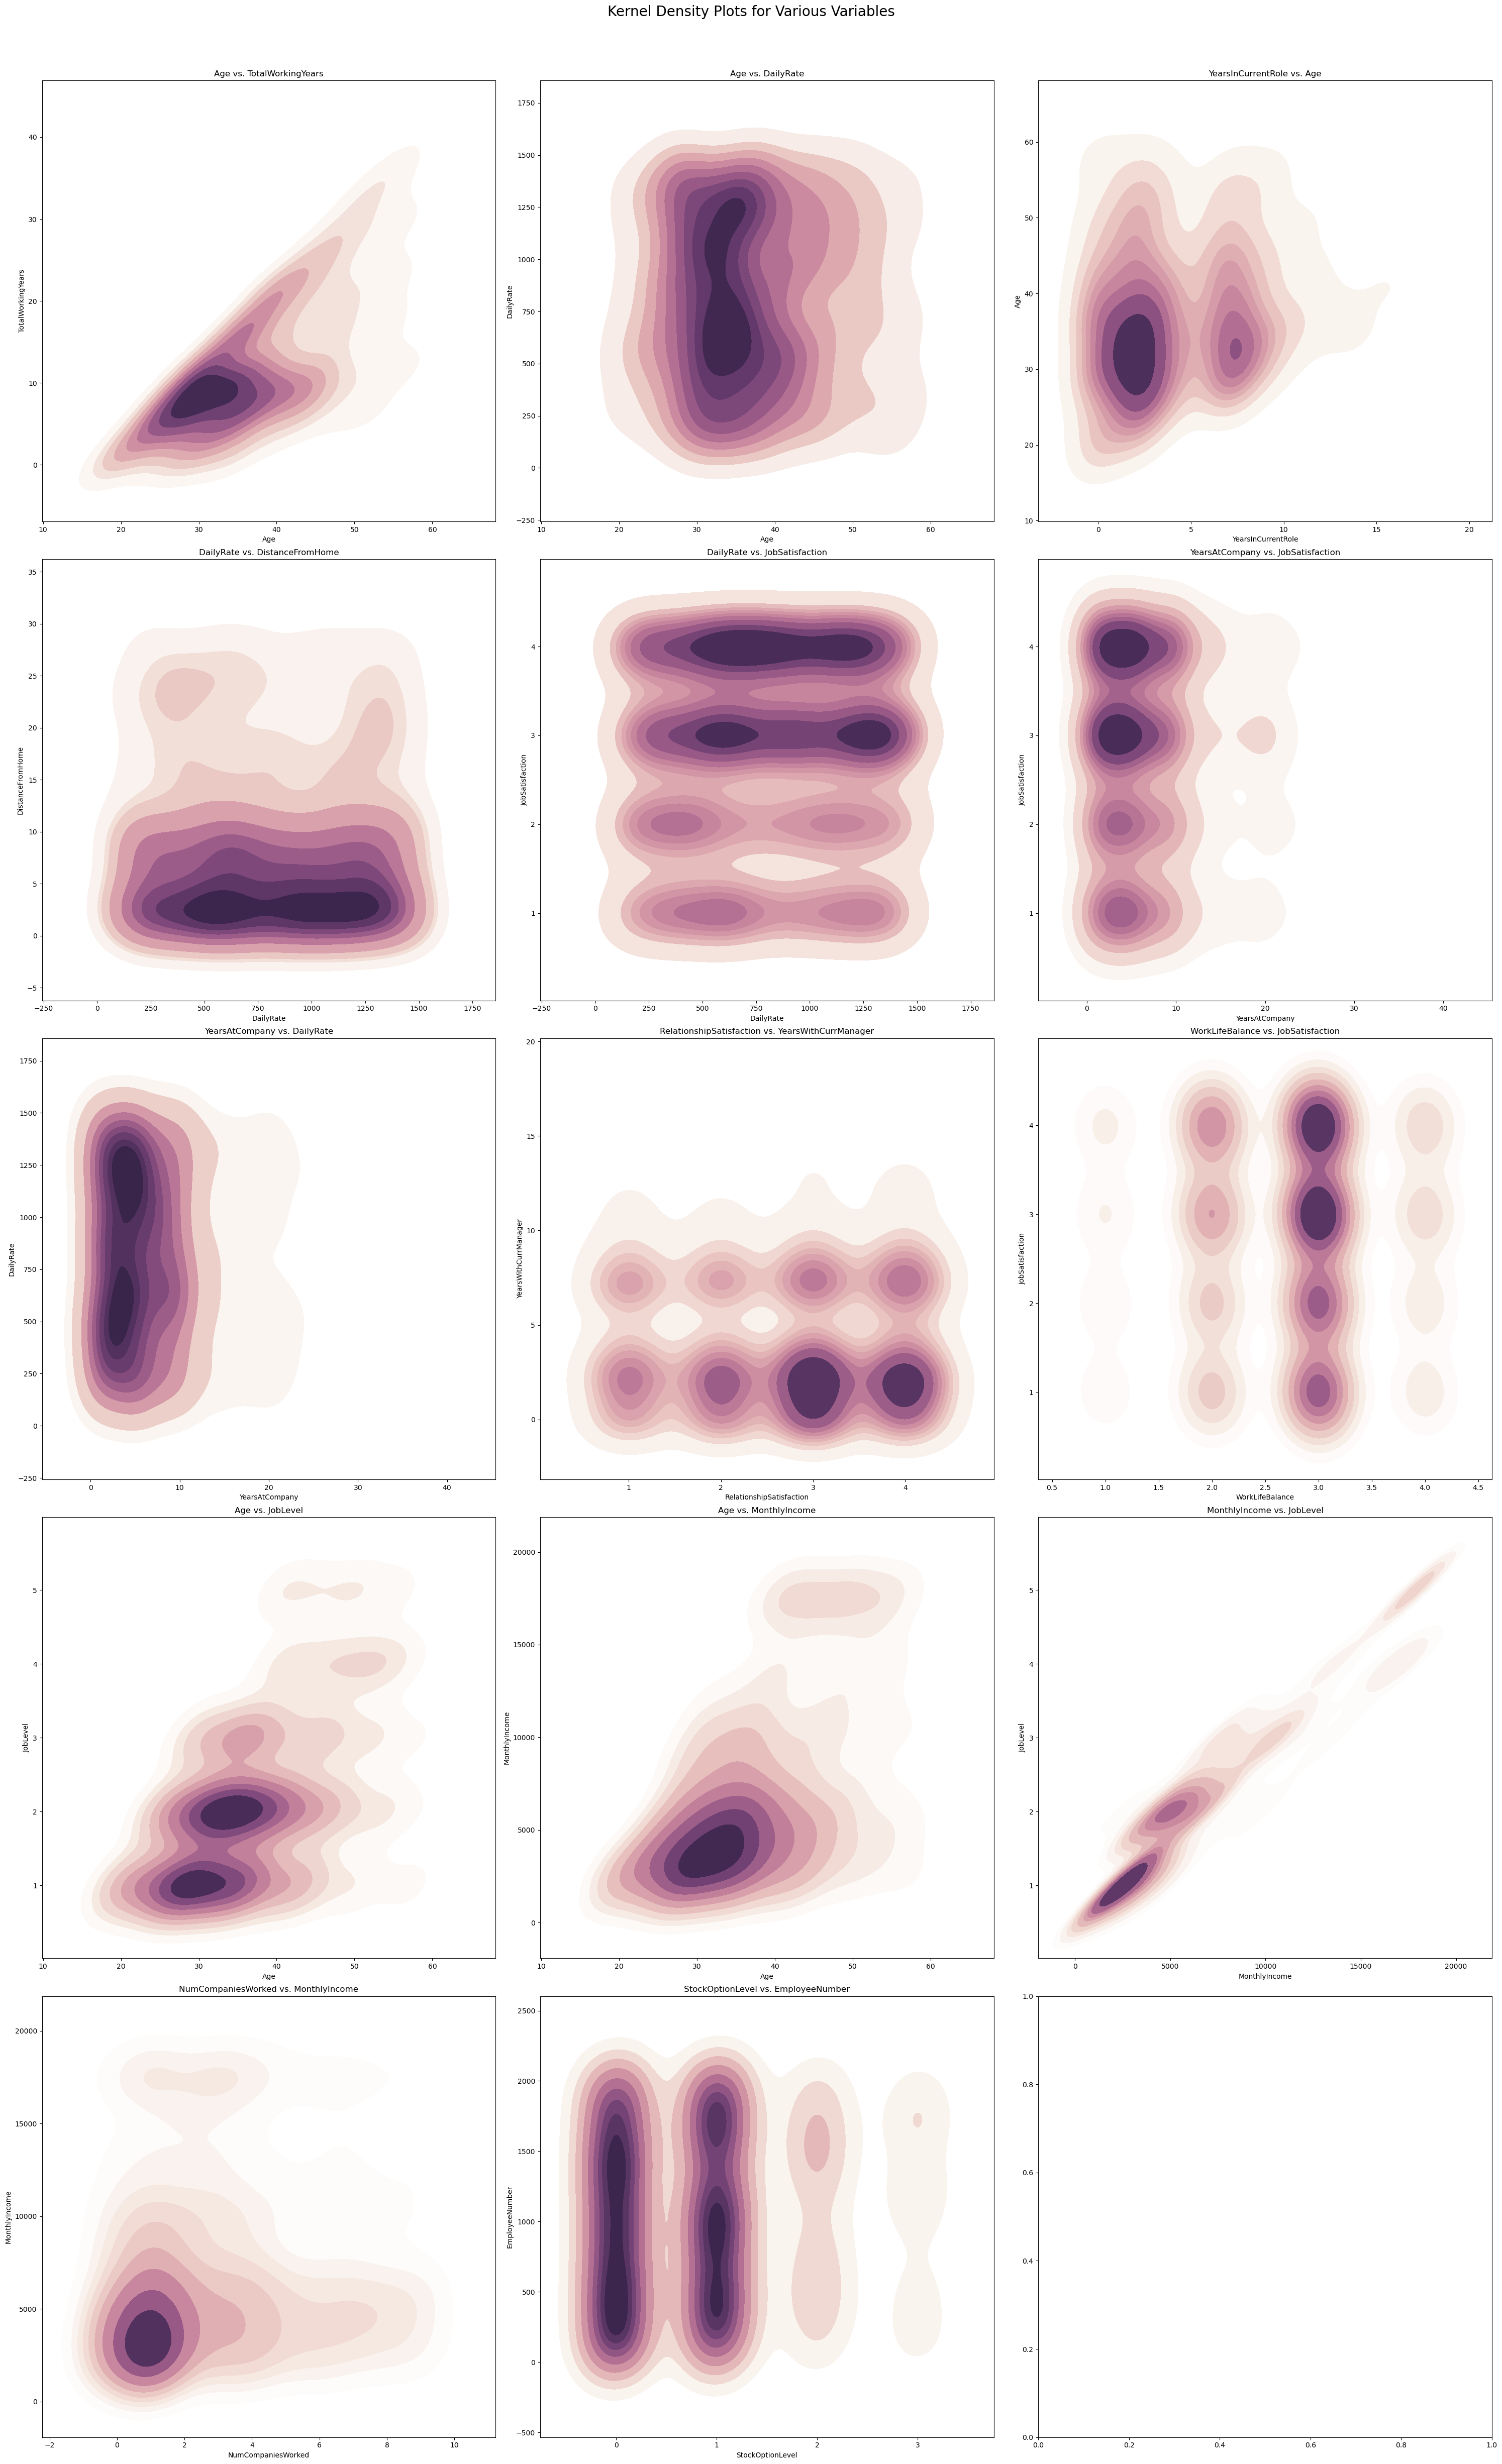

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating subplots
f, axes = plt.subplots(5, 3, figsize=(30, 50), sharex=False, sharey=False)

# Set color palette
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Initialize axes_x and axes_y
axes_x = 0
axes_y = 0

def plot_xy(x_label, y_label, axes_x, axes_y):
    x = df[x_label].values
    y = df[y_label].values
    sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[axes_x, axes_y])
    axes[axes_x, axes_y].set(title='{} vs. {}'.format(x_label, y_label), xlabel=x_label, ylabel=y_label)

    # Update counters
    axes_y = axes_y + 1
    if axes_y == 3:
        axes_y = 0
        axes_x = axes_x + 1

    return axes_x, axes_y

# Call the plot_xy function for each pair and update counters
axes_x, axes_y = plot_xy('Age', 'TotalWorkingYears', axes_x, axes_y)
axes_x, axes_y = plot_xy('Age', 'DailyRate', axes_x, axes_y)
axes_x, axes_y = plot_xy('YearsInCurrentRole', 'Age', axes_x, axes_y)
axes_x, axes_y = plot_xy('DailyRate', 'DistanceFromHome', axes_x, axes_y)
axes_x, axes_y = plot_xy('DailyRate', 'JobSatisfaction', axes_x, axes_y)
axes_x, axes_y = plot_xy('YearsAtCompany', 'JobSatisfaction', axes_x, axes_y)
axes_x, axes_y = plot_xy('YearsAtCompany', 'DailyRate', axes_x, axes_y)
axes_x, axes_y = plot_xy('RelationshipSatisfaction', 'YearsWithCurrManager', axes_x, axes_y)
axes_x, axes_y = plot_xy('WorkLifeBalance', 'JobSatisfaction', axes_x, axes_y)
axes_x, axes_y = plot_xy('Age', 'JobLevel', axes_x, axes_y)
axes_x, axes_y = plot_xy('Age', 'MonthlyIncome', axes_x, axes_y)
axes_x, axes_y = plot_xy('MonthlyIncome', 'JobLevel', axes_x, axes_y)
axes_x, axes_y = plot_xy('NumCompaniesWorked', 'MonthlyIncome', axes_x, axes_y)
axes_x, axes_y = plot_xy('StockOptionLevel', 'EmployeeNumber', axes_x, axes_y)

# Adjust layout
f.tight_layout()
f.subplots_adjust(top=0.95)  # Adjust top to make room for suptitle
f.suptitle("Kernel Density Plots for Various Variables", fontsize=20)
plt.show()


# Convert attrition to numericals


creating a new column called "Attrition_num" to convert the categorical values ('Yes' and 'No') into numerical values (1 and 0). The target_map dictionary is used for this conversion.

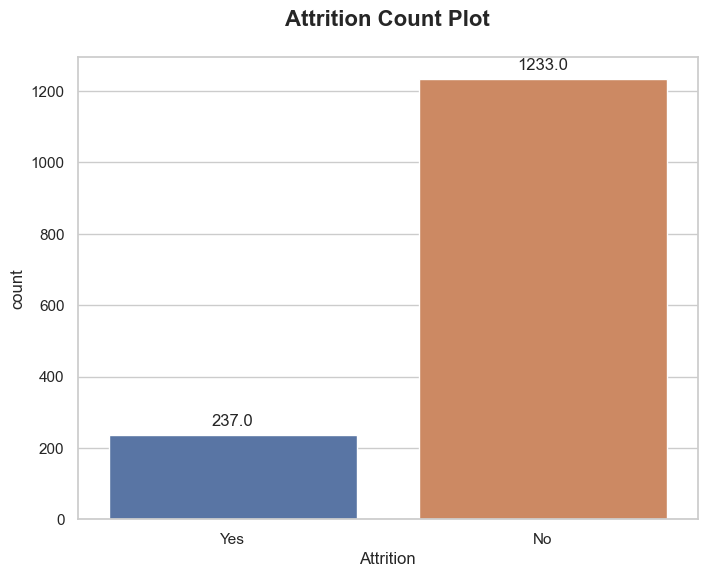

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a count plot of the original 'Attrition' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Attrition', data=df)

# Add count values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Attrition Count Plot\n', fontsize=16, fontweight='bold')
plt.show()

**#PAIRPLOT**

It is a type of data visualization in which a grid of scatterplots is created, allowing you to visualize the pairwise relationships between multiple variables in a dataset. It's especially useful when you want to explore how different variables are related to each other.

#For Categorical Variables
Applying ***Chi-square test*** Test

**Significance:**



*   If the p-value is less than the chosen significance level, you reject the null hypothesis.
*   If the p-value is greater than the significance level, you fail to reject the null hypothesis.




#'**Attrition**' is the target variable and we want to test its association with other categorical variables

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame and 'Attrition' is the dependent variable

# List to store significant and non-significant columns
significant_columns = []
non_significant_columns = []

# Extracting object columns (categorical variables) excluding 'Attrition'
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Attrition')

# Function to perform chi-square test and print results
def chi_square_test(column):
    contingency_table = pd.crosstab(df[column], df['Attrition'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Print results
    print(f"Chi-Square Test for {column}:")
    print("Null Hypothesis: There is no association between", column, "and Attrition")
    print("Alternative Hypothesis: There is an association between", column, "and Attrition")
    print(f"Test Statistics: {chi2:.4f}")
    print(f"P-Value: {p:.4f}")

    # Check significance level (e.g., 0.05)
    if p < 0.1:
        print("Conclusion: Reject the null hypothesis (Significant)")
        significant_columns.append(column)
    else:
        print("Conclusion: Fail to reject the null hypothesis (Non-significant)")
        non_significant_columns.append(column)

    print("\n")

# Perform chi-square test for each categorical variable
for column in categorical_columns:
    chi_square_test(column)

# Print the number of significant and non-significant columns
print("Number of Significant Columns:", len(significant_columns))
print("List of Significant Columns:", significant_columns)
print("\nNumber of Non-Significant Columns:", len(non_significant_columns))
print("List of Non-Significant Columns:", non_significant_columns)

# Delete non-significant columns from df
df.drop(non_significant_columns, axis=1, inplace=True)

Chi-Square Test for BusinessTravel:
Null Hypothesis: There is no association between BusinessTravel and Attrition
Alternative Hypothesis: There is an association between BusinessTravel and Attrition
Test Statistics: 24.1824
P-Value: 0.0000
Conclusion: Reject the null hypothesis (Significant)


Chi-Square Test for Department:
Null Hypothesis: There is no association between Department and Attrition
Alternative Hypothesis: There is an association between Department and Attrition
Test Statistics: 10.7960
P-Value: 0.0045
Conclusion: Reject the null hypothesis (Significant)


Chi-Square Test for EducationField:
Null Hypothesis: There is no association between EducationField and Attrition
Alternative Hypothesis: There is an association between EducationField and Attrition
Test Statistics: 16.0247
P-Value: 0.0068
Conclusion: Reject the null hypothesis (Significant)


Chi-Square Test for Gender:
Null Hypothesis: There is no association between Gender and Attrition
Alternative Hypothesis: There

#For Numerical Variables
Applying ***Kolmogorov-Smirnov*** (KS) Test

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming df is your DataFrame and 'Attrition' is the dependent variable

# List to store significant and non-significant columns
significant_numerical_columns = []
non_significant_numerical_columns = []

# Extracting numerical columns (int or float) excluding 'Attrition'
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Function to perform Mann-Whitney U test and print results
def mann_whitney_u_test(column):
    stat, p = mannwhitneyu(df[df['Attrition'] == 'Yes'][column],
                           df[df['Attrition'] == 'No'][column], alternative='two-sided')

    # Print results
    print(f"Mann-Whitney U Test for {column}:")
    print("Null Hypothesis: There is no difference in the distribution of", column, "between Attrition groups")
    print("Alternative Hypothesis: There is a difference in the distribution of", column, "between Attrition groups")
    print(f"Test Statistics: {stat:.4f}")
    print(f"P-Value: {p:.4f}")

    # Check significance level (e.g., 0.05)
    if p < 0.1:
        print("Conclusion: Reject the null hypothesis (Significant)")
        significant_numerical_columns.append(column)
    else:
        print("Conclusion: Fail to reject the null hypothesis (Non-significant)")
        non_significant_numerical_columns.append(column)

    print("\n")

# Perform Mann-Whitney U test for each numerical variable
for column in numerical_columns:
    mann_whitney_u_test(column)

# Print the number of significant and non-significant columns
print("Number of Significant Numerical Variables:", len(significant_numerical_columns))
print("List of Significant Numerical Variables:", significant_numerical_columns)
print("\nNumber of Non-Significant Numerical Variables:", len(non_significant_numerical_columns))
print("List of Non-Significant Numerical Variables:", non_significant_numerical_columns)

# Drop non-significant numerical columns from df
df.drop(non_significant_numerical_columns, axis=1, inplace=True)

Mann-Whitney U Test for Age:
Null Hypothesis: There is no difference in the distribution of Age between Attrition groups
Alternative Hypothesis: There is a difference in the distribution of Age between Attrition groups
Test Statistics: 106859.0000
P-Value: 0.0000
Conclusion: Reject the null hypothesis (Significant)


Mann-Whitney U Test for DailyRate:
Null Hypothesis: There is no difference in the distribution of DailyRate between Attrition groups
Alternative Hypothesis: There is a difference in the distribution of DailyRate between Attrition groups
Test Statistics: 133042.0000
P-Value: 0.0290
Conclusion: Reject the null hypothesis (Significant)


Mann-Whitney U Test for DistanceFromHome:
Null Hypothesis: There is no difference in the distribution of DistanceFromHome between Attrition groups
Alternative Hypothesis: There is a difference in the distribution of DistanceFromHome between Attrition groups
Test Statistics: 164225.5000
P-Value: 0.0024
Conclusion: Reject the null hypothesis (S

### Creating Dummy Variables for Logistic Model

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Get a list of object-type columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'Stage' from the list of object-type columns
object_columns.remove('Attrition')

# Print the list of columns before creating dummy variables
print("Columns before creating dummy variables:")
print(object_columns)

# Create dummy variables for each object-type column and drop the original columns
for col in object_columns:
    dummy_cols = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummy_cols], axis=1)
    df = df.drop(columns=[col])
df.head()

Columns before creating dummy variables:
['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


Age Attrition  DailyRate  DistanceFromHome  EnvironmentSatisfaction  \
0   41       Yes       1102                 1                        2   
1   49        No        279                 8                        3   
2   37       Yes       1373                 2                        4   
3   33        No       1392                 3                        4   
4   27        No        591                 2                        1   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  StockOptionLevel  \
0               3         2                4           5993                 0   
1               2         2                2           5130                 1   
2               2         1                3           2097                 0   
3               3         1                3           2909                 0   
4               3         1                2           3468                 1   

   ...  JobRole_Laboratory Technician  JobRole_Manager  \
0  ...                              0                0   
1  ...                              0                0   
2  ...                              1                0   
3  ...                              0                0   
4  ...                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 37 columns]

As our target/dependent variable is binary means it has only two outcomes so we'll use 'LOGISTIC REGRESSION' for training our model.

In [ ]:
df.head()

Age Attrition  DailyRate  DistanceFromHome  EnvironmentSatisfaction  \
0   41       Yes       1102                 1                        2   
1   49        No        279                 8                        3   
2   37       Yes       1373                 2                        4   
3   33        No       1392                 3                        4   
4   27        No        591                 2                        1   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  StockOptionLevel  \
0               3         2                4           5993                 0   
1               2         2                2           5130                 1   
2               2         1                3           2097                 0   
3               3         1                3           2909                 0   
4               3         1                2           3468                 1   

   ...  JobRole_Laboratory Technician  JobRole_Manager  \
0  ...                              0                0   
1  ...                              0                0   
2  ...                              1                0   
3  ...                              0                0   
4  ...                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 37 columns]

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find columns with null values in the correlation matrix
columns_with_null_corr = correlation_matrix.columns[correlation_matrix.isnull().any()]

# Drop columns with null values in the correlation matrix
df = df.drop(columns=columns_with_null_corr)

# Print columns deleted due to null values in correlation matrix
print("\nColumns deleted due to null values in correlation matrix:")
print(columns_with_null_corr)

# Print the final list of columns
print("\nFinal List of Columns after Deletion:")
print(df.columns.tolist())


Columns deleted due to null values in correlation matrix:
Index([], dtype='object')

Final List of Columns after Deletion:
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Ov

C:\Users\HP\AppData\Local\Temp\ipykernel_24696\1155483393.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
df.head()

Age Attrition  DailyRate  DistanceFromHome  EnvironmentSatisfaction  \
0   41       Yes       1102                 1                        2   
1   49        No        279                 8                        3   
2   37       Yes       1373                 2                        4   
3   33        No       1392                 3                        4   
4   27        No        591                 2                        1   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  StockOptionLevel  \
0               3         2                4           5993                 0   
1               2         2                2           5130                 1   
2               2         1                3           2097                 0   
3               3         1                3           2909                 0   
4               3         1                2           3468                 1   

   ...  JobRole_Laboratory Technician  JobRole_Manager  \
0  ...                              0                0   
1  ...                              0                0   
2  ...                              1                0   
3  ...                              0                0   
4  ...                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 37 columns]

### Change Values in column Attritation before Predictive Modeling

In [ ]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Stage' column
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

### Correlation Heatmap

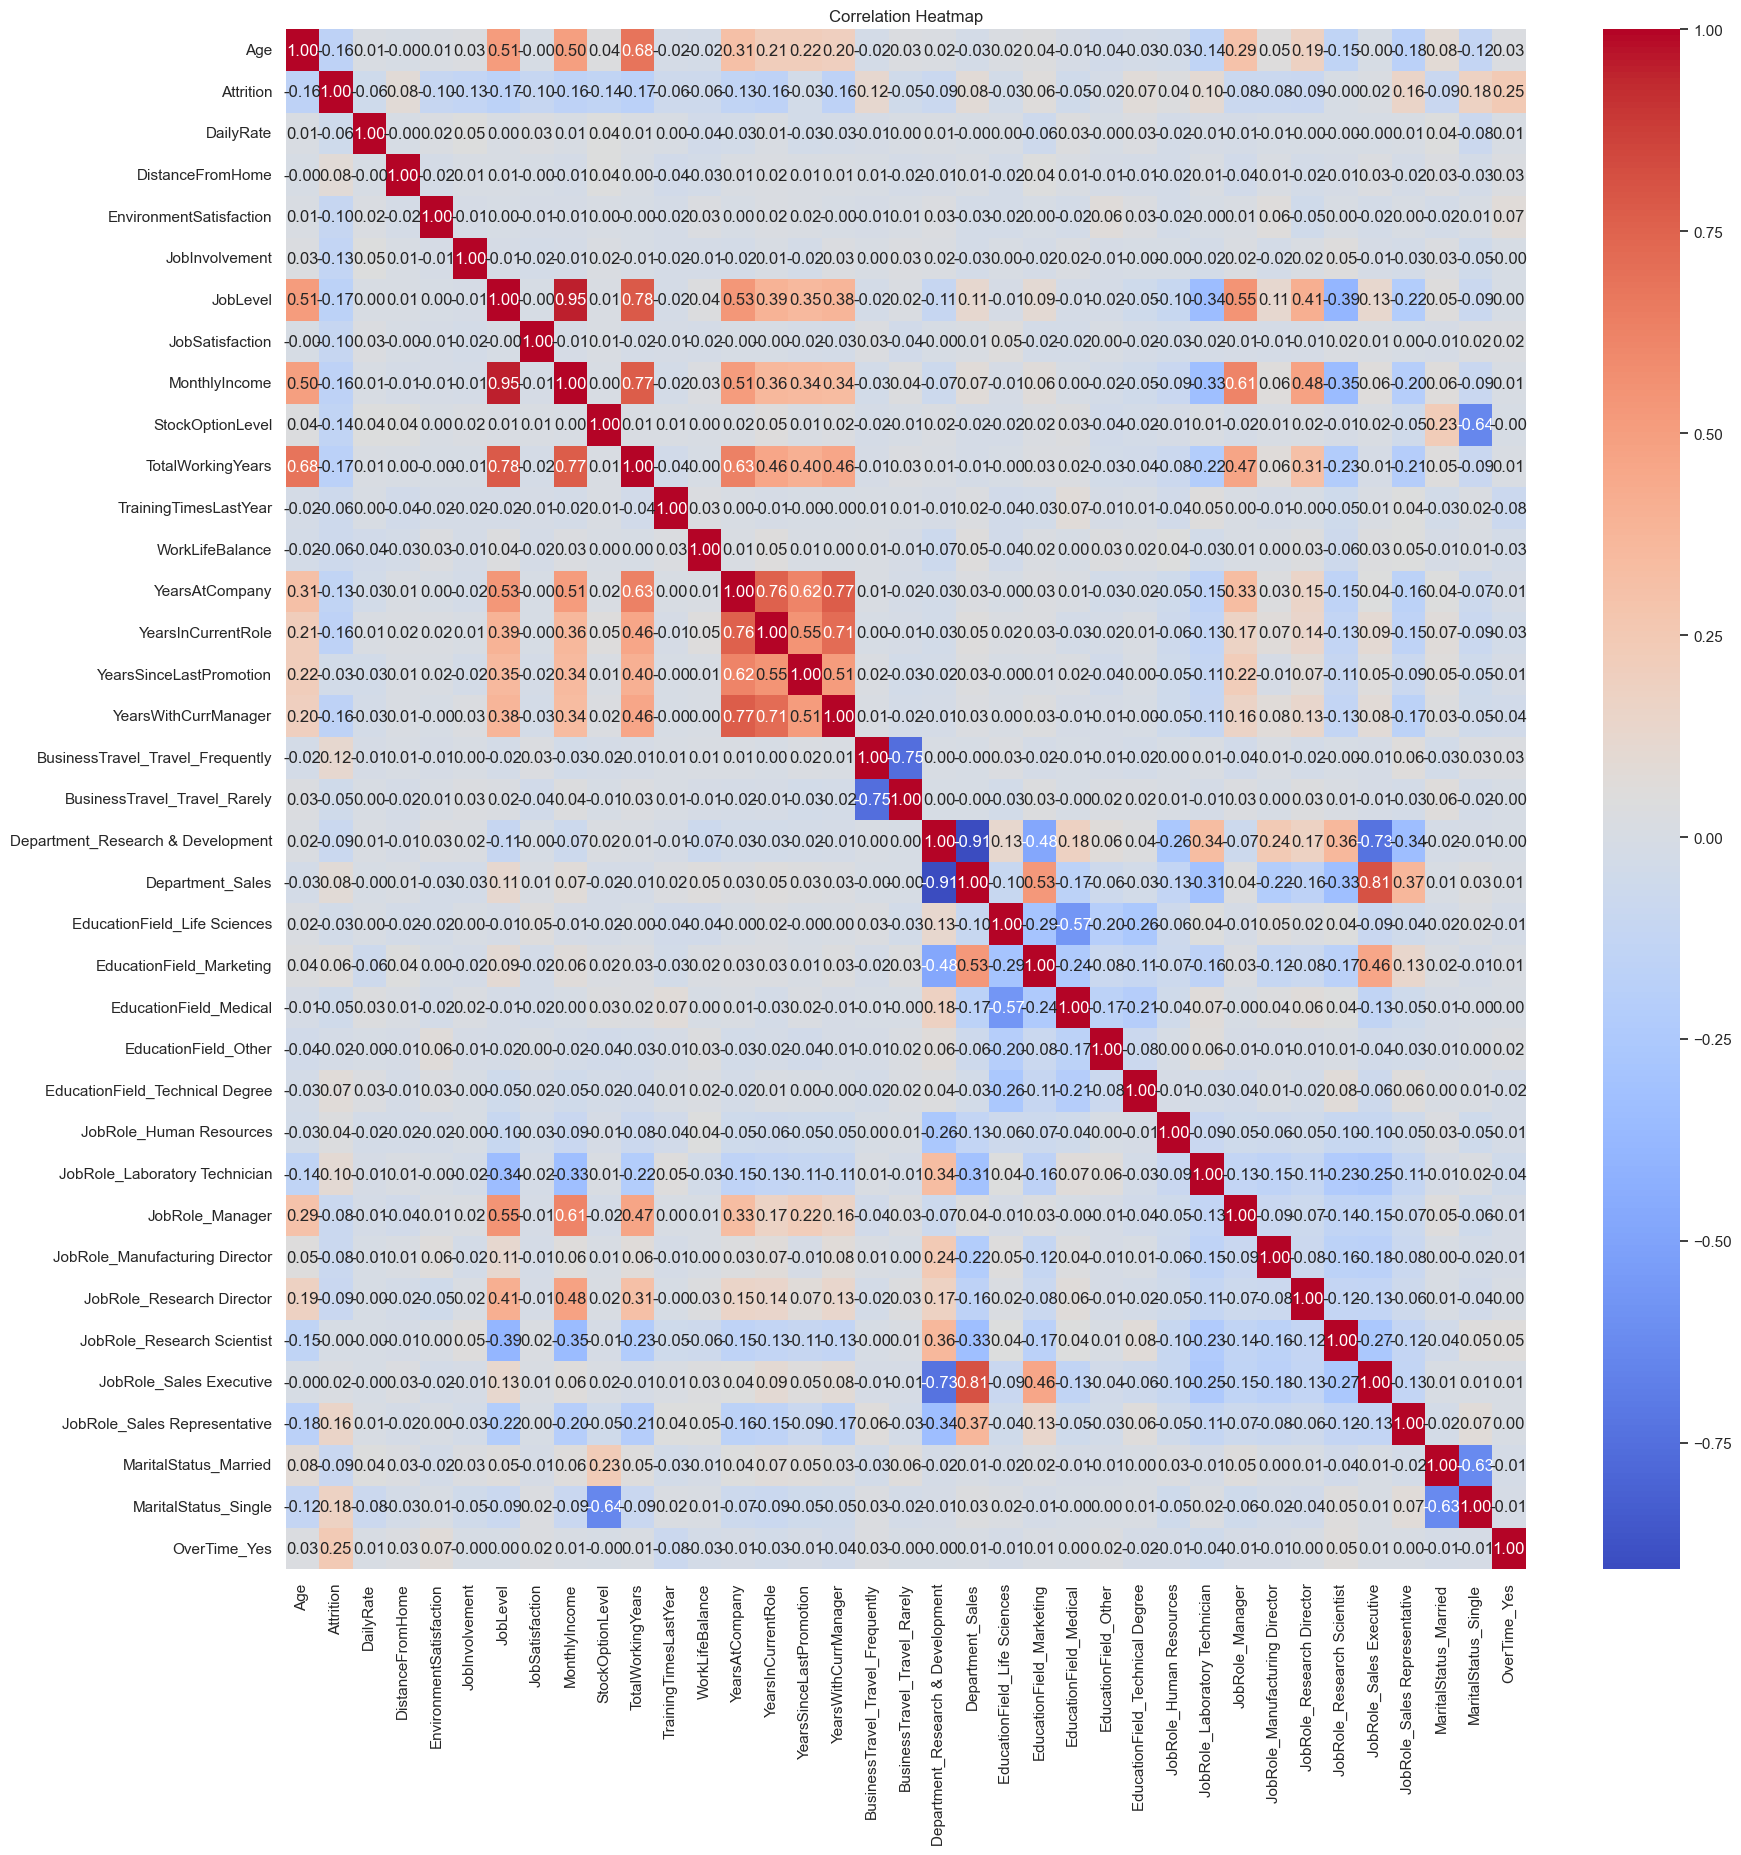

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.head()

Age  Attrition  DailyRate  DistanceFromHome  EnvironmentSatisfaction  \
0   41          1       1102                 1                        2   
1   49          0        279                 8                        3   
2   37          1       1373                 2                        4   
3   33          0       1392                 3                        4   
4   27          0        591                 2                        1   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  StockOptionLevel  \
0               3         2                4           5993                 0   
1               2         2                2           5130                 1   
2               2         1                3           2097                 0   
3               3         1                3           2909                 0   
4               3         1                2           3468                 1   

   ...  JobRole_Laboratory Technician  JobRole_Manager  \
0  ...                              0                0   
1  ...                              0                0   
2  ...                              1                0   
3  ...                              0                0   
4  ...                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 37 columns]

In [ ]:
# Convert all variables to float
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   float64
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   EnvironmentSatisfaction            1470 non-null   float64
 5   JobInvolvement                     1470 non-null   float64
 6   JobLevel                           1470 non-null   float64
 7   JobSatisfaction                    1470 non-null   float64
 8   MonthlyIncome                      1470 non-null   float64
 9   StockOptionLevel                   1470 non-null   float64
 10  TotalWorkingYears                  1470 non-null   float64
 11  TrainingTimesLastYear              1470 non-null   float

## **Applying LOGISTIC REGRESSION:**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Separate the dependent and independent variables
y = df['Attrition']
X = df.drop(columns=['Attrition'])

# Add a constant to the independent variables for the statsmodels logistic regression
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the model summary
print(result.summary())

         Current function value: 0.299299
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1139
Method:                           MLE   Df Model:                           36
Date:                Mon, 25 Dec 2023   Pseudo R-squ.:                  0.3397
Time:                        22:06:29   Log-Likelihood:                -351.98
converged:                      False   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 1.693e-55
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -16.5878   6435.495     -0.003      0.998   -1.26e+04    1.26e

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

# Fit the logistic regression model using scikit-learn
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

# Print confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for Test Data:")
print(conf_matrix_test)

# Print confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

# Print classification report for the test set
classification_report_test = classification_report(y_test, y_pred_test)
print("\nClassification Report for Test Data:")
print(classification_report_test)

# Print classification report for the training set
classification_report_train = classification_report(y_train, y_pred_train)
print("\nClassification Report for Training Data:")
print(classification_report_train)

# Print accuracy for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nAccuracy on Test Data:", accuracy_test)

# Print accuracy for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on Training Data:", accuracy_train)

# Calculate and print precision for the test set
precision_test = precision_score(y_test, y_pred_test)
print("\nPrecision on Test Data:", precision_test)

# Calculate and print precision for the training set
precision_train = precision_score(y_train, y_pred_train)
print("Precision on Training Data:", precision_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Test Data:
[[251   4]
 [ 39   0]]

Confusion Matrix for Training Data:
[[968  10]
 [181  17]]

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       255
         1.0       0.00      0.00      0.00        39

    accuracy                           0.85       294
   macro avg       0.43      0.49      0.46       294
weighted avg       0.75      0.85      0.80       294


Classification Report for Training Data:
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       978
         1.0       0.63      0.09      0.15       198

    accuracy                           0.84      1176
   macro avg       0.74      0.54      0.53      1176
weighted avg       0.81      0.84      0.78      1176


Accuracy on Test Data: 0.8537414965986394
Accuracy on Training Data: 0.8375850340136054

Precision on Test Data: 0.0
Precision on Training Data: 0.629

# ROC curve

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


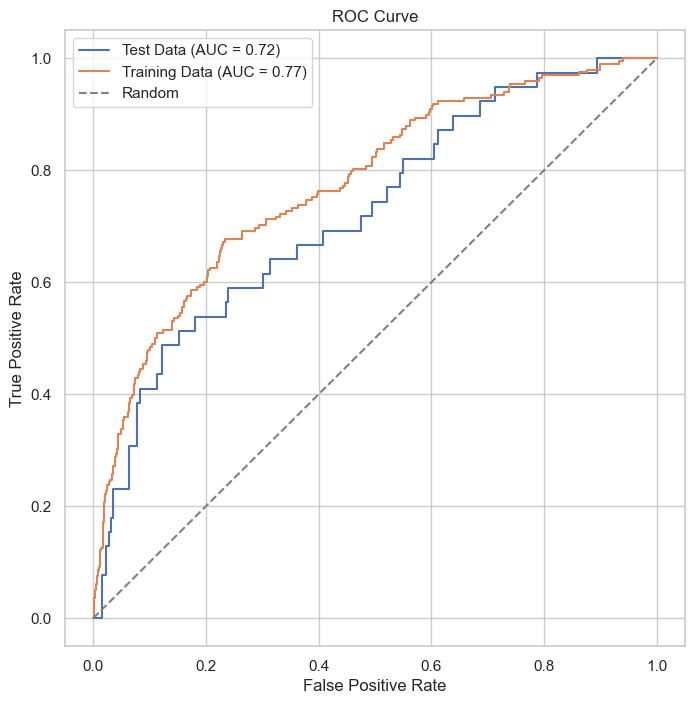

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Fit the logistic regression model using scikit-learn
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities on the test set
y_proba_test = logreg.predict_proba(X_test)[:, 1]
y_proba_train = logreg.predict_proba(X_train)[:, 1]

# Calculate the ROC curve for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

# Calculate the ROC curve for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot ROC curve for test set
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, label=f'Test Data (AUC = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Training Data (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Feature importance (coefficients) from the logistic regression model

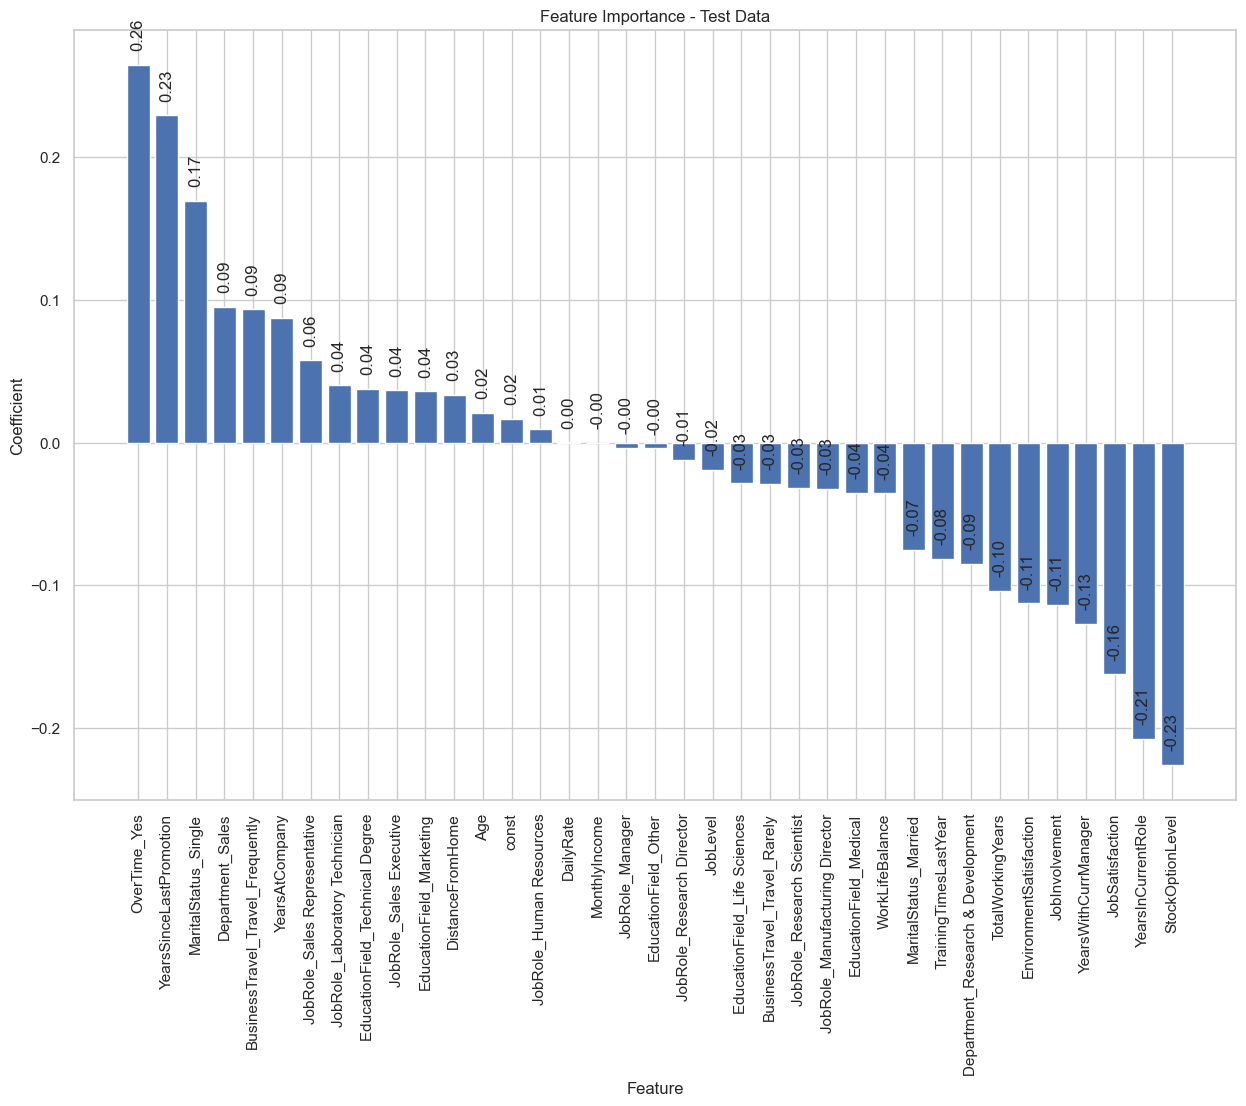

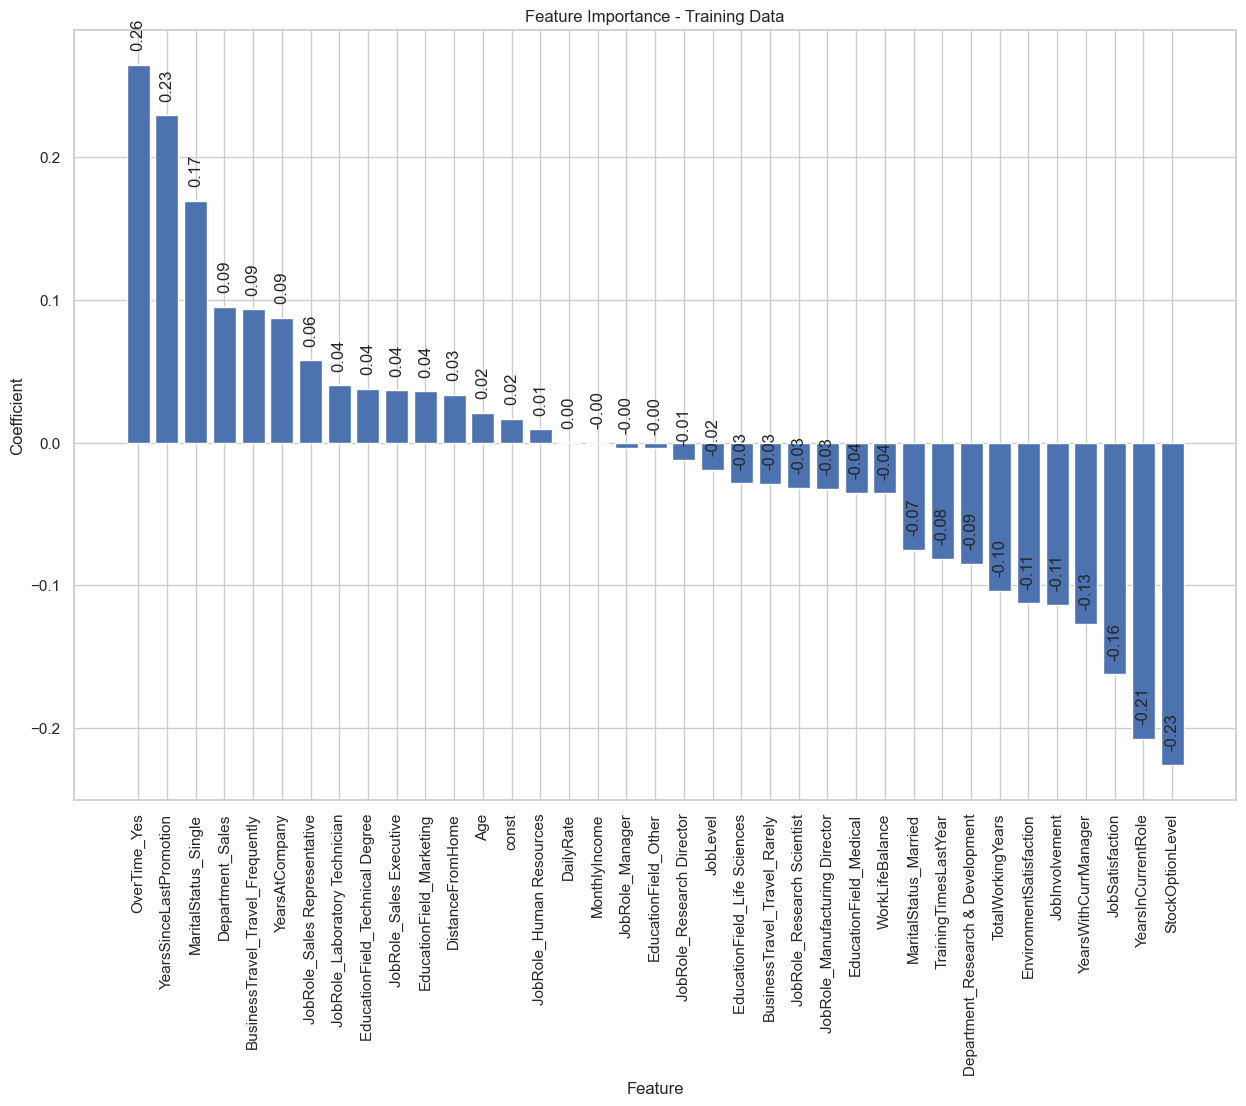

In [ ]:
# Feature importance for test data
feature_importance_test = pd.DataFrame({'Feature': X_test.columns, 'Coefficient': logreg.coef_[0]})
feature_importance_test = feature_importance_test.sort_values(by='Coefficient', ascending=False)

# Plotting feature importance for test data
plt.figure(figsize=(15, 10))
plt.bar(feature_importance_test['Feature'], feature_importance_test['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance - Test Data')

# Add text labels on top of the bars
for i, value in enumerate(feature_importance_test['Coefficient']):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', rotation=90)  # Rotate labels at 90 degrees

plt.xticks(rotation=90, ha='center')  # Keep rotation for x-axis ticks
plt.show()

# Feature importance for training data
feature_importance_train = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logreg.coef_[0]})
feature_importance_train = feature_importance_train.sort_values(by='Coefficient', ascending=False)

# Plotting feature importance for training data
plt.figure(figsize=(15, 10))
plt.bar(feature_importance_train['Feature'], feature_importance_train['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance - Training Data')

# Add text labels on top of the bars
for i, value in enumerate(feature_importance_train['Coefficient']):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', rotation=90)  # Rotate labels at 90 degrees

plt.xticks(rotation=90, ha='center')  # Keep rotation for x-axis ticks
plt.show()